In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading all the datasets

In [2]:
customers = pd.read_csv('/Users/vij/Documents/ecommerce/customers_dataset.csv')
geolocation = pd.read_csv('/Users/vij/Documents/ecommerce/geolocation_dataset.csv')
order_items = pd.read_csv('/Users/vij/Documents/ecommerce/order_items_dataset.csv')
order_payments = pd.read_csv('/Users/vij/Documents/ecommerce/order_payments_dataset.csv')
order_reviews = pd.read_csv('/Users/vij/Documents/ecommerce/order_reviews_dataset.csv')
orders = pd.read_csv('/Users/vij/Documents/ecommerce/orders_dataset.csv')
products = pd.read_csv('/Users/vij/Documents/ecommerce/products_dataset.csv')
sellers = pd.read_csv('/Users/vij/Documents/ecommerce/sellers_dataset.csv')
category_translation = pd.read_csv('/Users/vij/Documents/ecommerce/product_category_name_translation.csv')

## Checking Missing Values

In [3]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
customers.duplicated().sum()

np.int64(0)

In [5]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [6]:
geolocation.duplicated().sum()

np.int64(261831)

In [7]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [8]:
order_items.duplicated().sum()

np.int64(0)

In [9]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
order_payments.duplicated().sum()

np.int64(0)

In [11]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [12]:
sellers.duplicated().sum()

np.int64(0)

In [13]:
category_translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [14]:
sellers.duplicated().sum()

np.int64(0)

In [15]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Missing values can be ignored here as the review title and message are not mandatory, and we can work with the review score.

In [16]:
order_reviews.duplicated().sum()

np.int64(0)

In [17]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [18]:
products.duplicated().sum()

np.int64(0)

In [19]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
products.shape

(32951, 9)

- Product category names need to be mapped to the correct names and the extra values can be mapped to 'Other' and if we still have null values they can be mapped as 'unknown'

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
orders.duplicated().sum()

np.int64(0)

## Data Cleaning

In [23]:
geolocation.duplicated(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']).value_counts()

False    738332
True     261831
Name: count, dtype: int64

In [24]:
geolocation = geolocation.drop_duplicates()
geolocation.duplicated().sum()

np.int64(0)

### Duplicate Entries Found
There were **261,831 duplicate rows** in the geolocation dataset based on columns and these rows were duplicates and didn't add any new information.

## Mapping product categories to English 

In [25]:
category_dict = dict(zip(category_translation['product_category_name'], 
                         category_translation['product_category_name_english']))

In [26]:
products['product_category_name_english'] = products['product_category_name'].map(category_dict)

In [27]:
missing_translation = products['product_category_name_english'].isna() & products['product_category_name'].notna()
products.loc[missing_translation, 'product_category_name_english'] = 'other'

In [28]:
# Checking how many categories names have other
other_count = products[products['product_category_name_english'] == 'other'].shape[0]
print(f"Number of products with category 'other': {other_count}")


Number of products with category 'other': 13


In [29]:
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    610
dtype: int64

In [30]:
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products['product_category_name_english'] = products['product_category_name_english'].fillna('unknown')
products['product_name_lenght'] = products['product_name_lenght'].fillna('unknown')
products['product_description_lenght'] = products['product_description_lenght'].fillna('unknown')
products['product_photos_qty'] = products['product_name_lenght'].fillna('unknown')

In [31]:
products.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

## Cleaning Orders dataset

In [32]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [33]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [35]:
mask = (orders['order_approved_at'].isnull()) & (orders['order_status']=='canceled')
orders[mask].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00


In [36]:
orders[orders["order_approved_at"].isnull()]["order_status"].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [37]:
orders[orders["order_approved_at"].isnull() & (orders["order_status"] == "delivered")]["order_id"].values

array(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'], dtype=object)

In [38]:
order_payments[order_payments["order_id"].isin(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1430,e04abd8149ef81b95221e88f6ed9ab6a,1,boleto,1,349.01
28903,c1d4211b3dae76144deccd6c74144a88,1,boleto,1,54.51
39345,5cf925b116421afa85ee25e99b4c34fb,1,boleto,1,106.81
39368,51eb2eebd5d76a24625b31c33dd41449,1,boleto,1,77.06
40373,12a95a3c06dbaec84bcfb0e2da5d228a,1,boleto,1,95.76
41416,3c0b8706b065f9919d0505d3b3343881,1,boleto,1,157.19
44659,2eecb0d85f281280f79fa00f9cec1a95,1,boleto,1,154.23
44706,88083e8f64d95b932164187484d90212,1,boleto,1,127.04
60305,2babbb4b15e6d2dfe95e2de765c97bce,1,boleto,1,106.81
64205,7013bcfc1c97fe719a7b5e05e61c12db,1,boleto,1,65.52


In [39]:
orders.loc[orders['order_approved_at'].isnull() & (orders['order_status'] == 'delivered'), 'order_approved_at'] = orders['order_purchase_timestamp']

In [40]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [41]:
orders[orders["order_delivered_carrier_date"].isnull()]["order_status"].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [42]:
orders[orders["order_delivered_customer_date"].isnull()]["order_status"].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [43]:
orders[(orders["order_delivered_customer_date"].isnull()) & (orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [44]:
orders[(orders["order_delivered_carrier_date"].isnull()) & (orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


In [45]:
orders_del = ["2d858f451373b04fb5c984a1cc2defaf", "2aa91108853cecb43c84a5dc5b277475"]
orders = orders[~orders["order_id"].isin(orders_del)].copy()

In [46]:
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"])

In [47]:
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

In [48]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1781
order_delivered_customer_date       0
order_estimated_delivery_date       0
dtype: int64

### Handling Missing Values in the orders Dataset
- **Two unreliable orders** were removed because they had missing or incorrect delivery information.
- **Missing values** in **order_delivered_customer_date** were filled using the estimated delivery date to keep delivery timelines consistent.
- **Missing values** in **order_approved_at were filled** using the purchase time to avoid gaps in order processing.
- **Missing values** in **order_delivered_carrier_date** were kept as they reflect real situations:
  - Orders that were canceled or unavailable were never shipped.
  - Orders still being processed haven’t been shipped yet.

**Final result:** Only order_delivered_carrier_date has missing values (1781 rows), which are expected and meaningful.


## Data Prep

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99439 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99439 non-null  object
 1   customer_id                    99439 non-null  object
 2   order_status                   99439 non-null  object
 3   order_purchase_timestamp       99439 non-null  object
 4   order_approved_at              99439 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  99439 non-null  object
 7   order_estimated_delivery_date  99439 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


- One of the key insights any e-commerce platform owner would want to know is the amount of time taken for a parcel to be delivered from the beginning of the order process to the moment it reaches the customer.

In [50]:
# 1. Converting date columns to datetime objects
date_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date']

In [51]:
for column in date_columns:
    orders[column] = pd.to_datetime(orders[column])

In [52]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99439 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99439 non-null  object        
 1   customer_id                    99439 non-null  object        
 2   order_status                   99439 non-null  object        
 3   order_purchase_timestamp       99439 non-null  datetime64[ns]
 4   order_approved_at              99439 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  99439 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99439 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB


In [53]:
# 2. Creating time-based metrics
orders['approval_time'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['shipping_time'] = orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
orders['estimated_vs_actual'] = orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']

In [54]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,shipping_time,delivery_time,estimated_vs_actual
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,7 days 02:34:47
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,13 days 18:46:08,5 days 08:32:15
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 09:27:40,17 days 05:53:31
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,13 days 05:00:36,12 days 23:31:18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,2 days 20:58:23,9 days 05:42:58


In [55]:
orders['delivery_time'].mean()

Timedelta('12 days 22:06:40.734832409')

The **average delivery time** for orders in this e-commerce platform is **12 days and 22 hours** (from purchase to customer delivery).
This metric represents the complete end-to-end customer waiting experience, encompassing the entire fulfillment journey:
- Order processing time
- Preparation and packing
- Shipping transit time
- Last-mile delivery
- This is on the higher end which should be addressed and reduced.

## Date & Day conversion 

In [56]:
# Converting to days for easier analysis
orders['approval_time_days'] = orders['approval_time'].dt.total_seconds() / (24 * 3600)
orders['shipping_time_days'] = orders['shipping_time'].dt.total_seconds() / (24 * 3600)
orders['delivery_time_days'] = orders['delivery_time'].dt.total_seconds() / (24 * 3600)
orders['estimated_vs_actual_days'] = orders['estimated_vs_actual'].dt.total_seconds() / (24 * 3600)

In [57]:
orders['delivered_on_time'] = orders['order_delivered_customer_date'] <= orders['order_estimated_delivery_date']

In [58]:
orders['delivered_on_time'] = orders['delivered_on_time'].astype(int)

In [59]:
orders['delivered_late'] = 1 - orders['delivered_on_time']

In [60]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time,shipping_time,delivery_time,estimated_vs_actual,approval_time_days,shipping_time_days,delivery_time_days,estimated_vs_actual_days,delivered_on_time,delivered_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,7 days 02:34:47,0.007431,2.366493,8.436574,7.107488,1,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,13 days 18:46:08,5 days 08:32:15,1.279745,0.462882,13.782037,5.355729,1,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 09:27:40,17 days 05:53:31,0.011505,0.204595,9.394213,17.245498,1,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,13 days 05:00:36,12 days 23:31:18,0.012419,3.745833,13.208750,12.980069,1,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,2 days 20:58:23,9 days 05:42:58,0.042940,0.893113,2.873877,9.238171,1,0


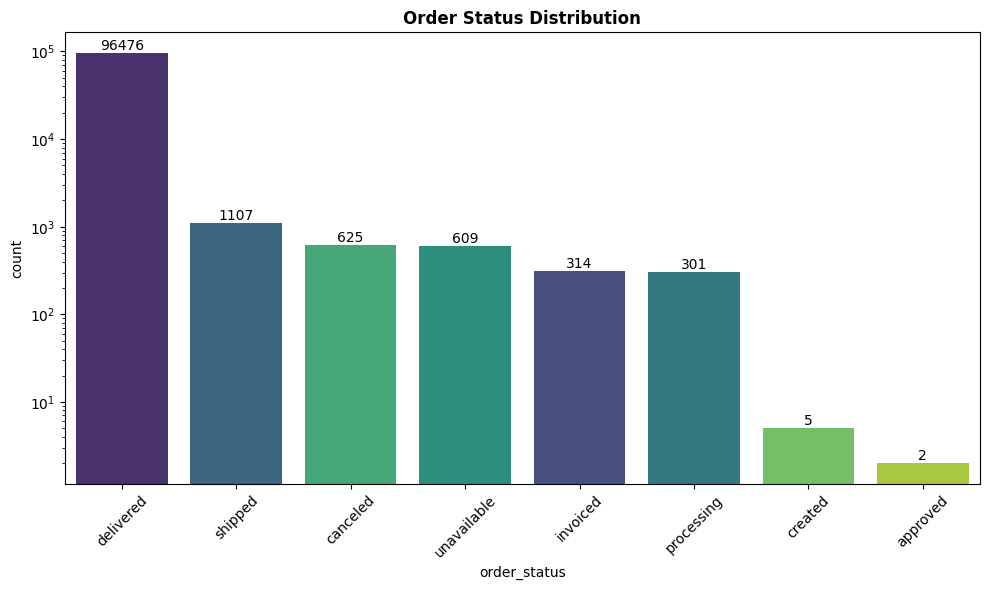

In [61]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=orders, x='order_status', order=orders['order_status'].value_counts().index, palette='viridis',hue='order_status', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.yscale('log')
plt.title('Order Status Distribution', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Order Status Distribution (Log Scale to get better visual) - Insights
- 96476 orders (97.02%) were sucessfully delivered to the customers.
- 1107 orders (1.11%) are shipped to the customers.
- 625 orders (0.63%) are cancelled.
- 609 orders (0.61%) are the unavailable ones that are probably the ones that got cancelled and are in return
- 314 orders (0.32%) are the invoiced orders
- 601 orders (0.30%) are the in preprocessing
- 5 orders (0.01%) are created
- 2 orders are approved

## No of orders delivered on / before time

In [62]:
delivery_counts = orders['delivered_on_time'].value_counts()

In [63]:
delivery_counts

delivered_on_time
1    91613
0     7826
Name: count, dtype: int64

In [64]:
delivery_counts.index = delivery_counts.index.map({1: 'Yes', 0: 'No'})

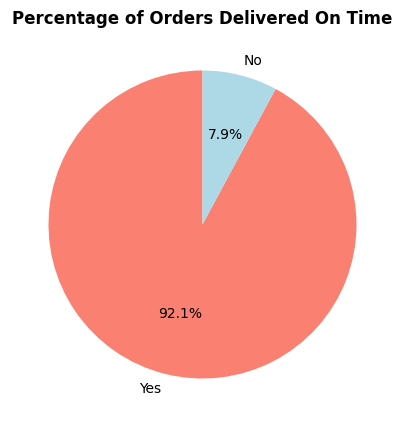

In [65]:
plt.figure(figsize=(5,5))
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.1f%%', colors=['salmon', 'lightblue'], startangle=90)
plt.title('Percentage of Orders Delivered On Time', fontweight='bold')
plt.show()

### Percentage of Orders Delivered On Time - Insights
- Here we can understand that majority of the orders **92.1%** (Yes) were delivered on time and comparatively a few of the orders **7.9%** (No) were delivered late.

## Order-Payment View
This connects payment details to order information, enabling to:
- **Analyze popular payment methods**  
- **Study installment preferences by order value** 
- **Calculate total revenue and average order values**

In [66]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [67]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [68]:
order_payments_filtered = order_payments[order_payments['payment_type'] != 'not_defined']

In [69]:
total_paymentlen = len(order_payments_filtered)

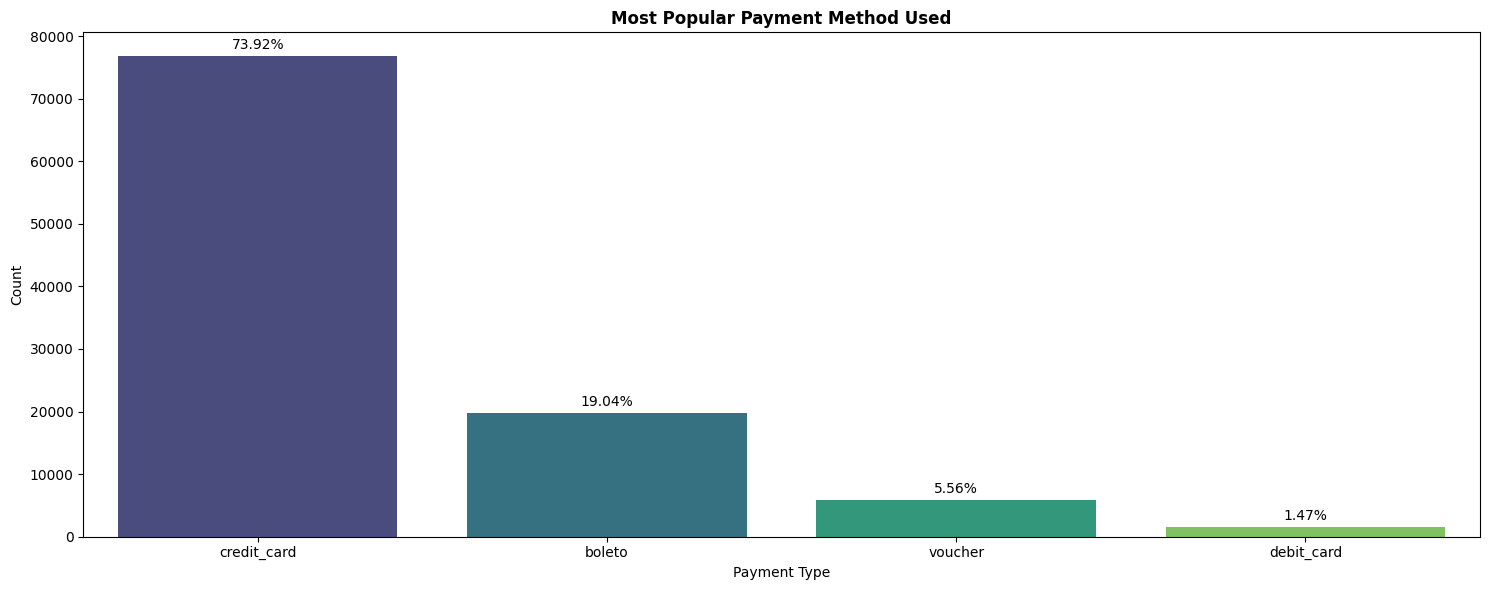

In [70]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=order_payments_filtered, x='payment_type', palette='viridis', hue='payment_type', legend=False)
for container in ax.containers:
    labels = [f'{(v.get_height() / total_paymentlen * 100):.2f}%' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)
plt.title('Most Popular Payment Method Used', fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Payment Type')
plt.tight_layout()
plt.show()

### Most Popular Payment Method Used - insights
- Credit cards account for nearly three‑quarters of all transactions (73.67%), followed by boleto bancário at 19.04%, vouchers at 5.56%, and debit cards at 1.47%. This shows the most popular payment method used.


In [71]:
# Joining Order-Payment View
order_payment_view = orders.merge(order_payments, on='order_id', how='left')

In [72]:
# Summarize payment info for each order
order_payment_summary = order_payments.groupby('order_id').agg(
    payment_count=('payment_sequential', 'count'),
    total_payment=('payment_value', 'sum'),
    total_installments=('payment_installments', 'sum')
).reset_index()

In [73]:
primary_payment_method = []
for order_id, group in order_payments.groupby('order_id'):
    most_common_method = group['payment_type'].mode()[0]
    primary_payment_method.append({
        'order_id': order_id,
        'primary_payment_type': most_common_method
    })
payment_type_df = pd.DataFrame(primary_payment_method)

In [74]:
order_payment_summary.head()

,order_id,payment_count,total_payment,total_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,1,259.83,3
2,000229ec398224ef6ca0657da4fc703e,1,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,1,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,3


In [75]:
order_payment_summary = order_payment_summary.merge(payment_type_df, on='order_id', how='left')

In [76]:
order_payment_summary.head()

,order_id,payment_count,total_payment,total_installments,primary_payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,1,72.19,2,credit_card
1,00018f77f2f0320c557190d7a144bdd3,1,259.83,3,credit_card
2,000229ec398224ef6ca0657da4fc703e,1,216.87,5,credit_card
3,00024acbcdf0a6daa1e931b038114c75,1,25.78,2,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,218.04,3,credit_card


In [77]:
order_payment_summary.describe()

,payment_count,total_payment,total_installments
count,99440.000000,99440.000000,99440.000000
mean,1.044710,160.990267,2.980923
std,0.381166,221.951257,2.741810
min,1.000000,0.000000,0.000000
25%,1.000000,62.010000,1.000000
50%,1.000000,105.290000,2.000000
75%,1.000000,176.970000,4.000000
max,29.000000,13664.080000,29.000000


**Descriptive Analysis of Total Payments and Total Installments**
- The average value of total payments is 160.99 and maximum total payment being 1,3664.08
- The average value of total installments is 2.98 and maximum total installments being 29

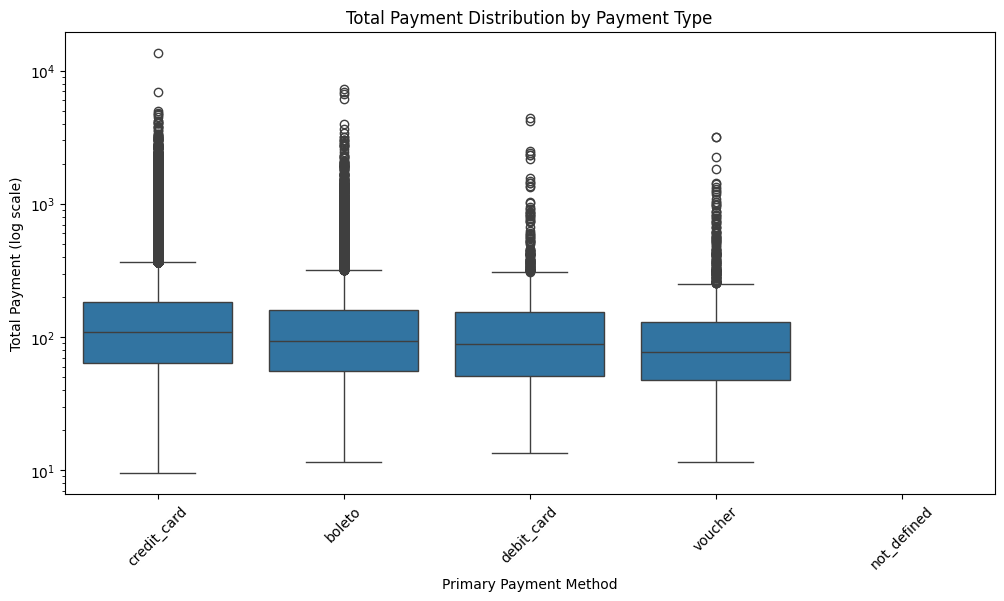

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=order_payment_summary, x='primary_payment_type', y='total_payment')
plt.yscale('log')  # Makes it easier to read if there's a huge range
plt.title("Total Payment Distribution by Payment Type")
plt.xlabel("Primary Payment Method")
plt.ylabel("Total Payment (log scale)")
plt.xticks(rotation=45)
plt.show()

- All payment types have a similar median payment value.
- Credit card and boleto have a large number of high-value outliers.
- Vouchers and not_defined tend to have lower median payments and less variation.

## Customer,Orders & Payments View

This connects each order with customer location data, enabling to:
- **Track sales by city and state**  
- **Identify regions with high or low customer activity**  
- **Analyze purchase behavior across different geographic areas**


In [79]:
customer_orders = orders.merge(customers, on='customer_id', how='left')

In [80]:
customer_order_payments = customer_orders.merge(order_payment_summary, on='order_id', how='left')

**Merging these datasets gives one consolidated view with:**
- Geographic info (city/state)
- Order time
- Customer ID
- Total order value and installment info

### Total Sales By State

In [81]:
sales_by_state = customer_order_payments.groupby('customer_state')['total_payment'].sum().reset_index()

In [82]:
sales_by_state.head()

,customer_state,total_payment
0,AC,19680.62
1,AL,96962.06
2,AM,27966.93
3,AP,16262.80
4,BA,616645.82


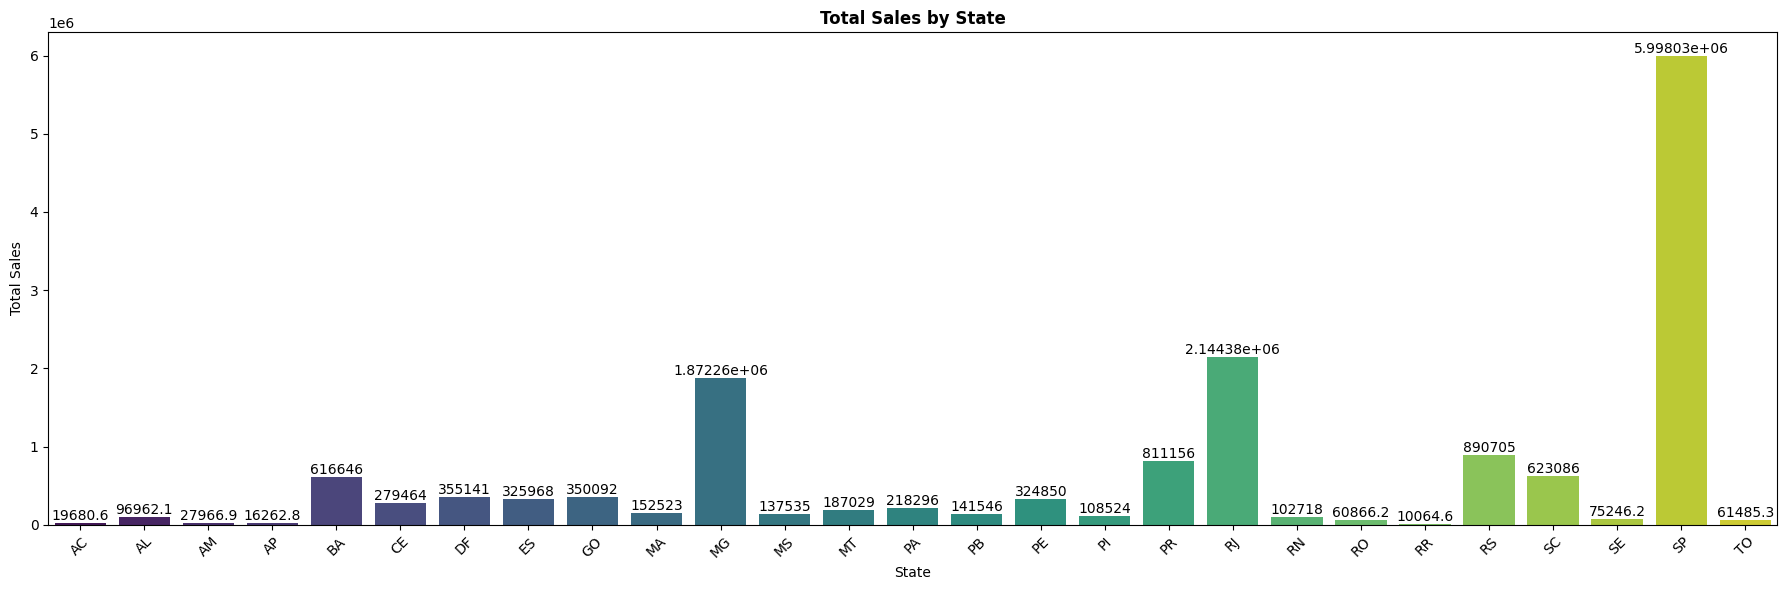

In [83]:
plt.figure(figsize=(18,6))
ax = sns.barplot(data=sales_by_state, x='customer_state', y='total_payment', palette='viridis',hue='customer_state',legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Total Sales by State", fontweight='bold')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Sales by State – Customer Distribution Analysis - Key Insights

- **Sao Paulo (SP)** stands out as the highest contributor, with **over 5.7 million BRL** in total payments. This aligns with SP being **Brazil's most populous and economically dominant state**.

- **Rio de Janeiro (RJ)** and **Minas Gerais (MG)** follow, with approximately **2.05M BRL** and **1.82M BRL** in total sales respectively, indicating **strong purchasing power and online retail engagement**.

- Other notable contributors include **Rio Grande do Sul (RS)**, **Parana (PR)**, and **Bahia (BA)**, each contributing **significant sales volumes**.

- In contrast, **northern and lesser-populated states** like **Roraima (RR)**, **Amapa (AP)**, and **Acre (AC)** contribute **much lower sales**, reflecting either **lower e-commerce penetration** or **smaller customer bases**.

### Total sales by city

In [84]:
sales_by_city = customer_order_payments.groupby('customer_city')['total_payment'].sum().reset_index()
top_cities = sales_by_city.sort_values(by='total_payment', ascending=False).head(15)

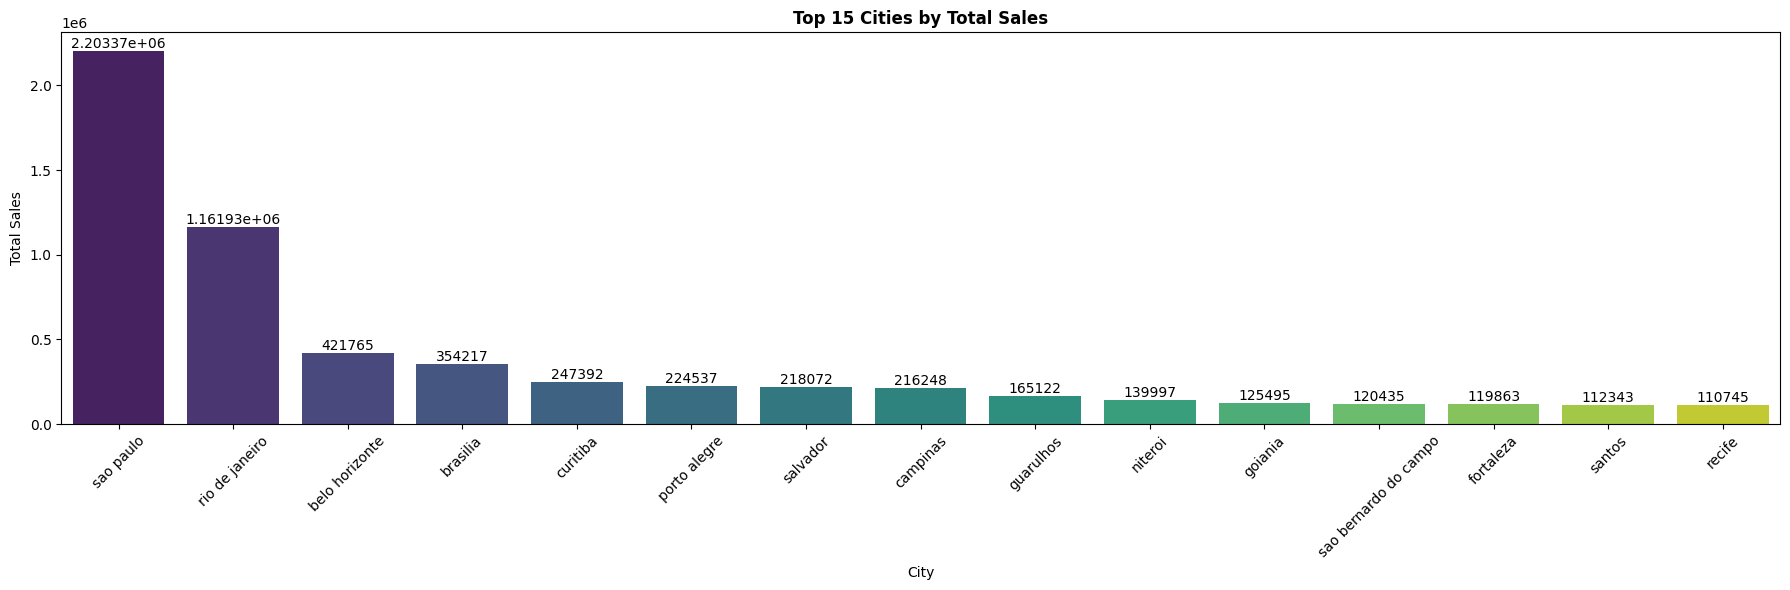

In [85]:
plt.figure(figsize=(18,6))
ax = sns.barplot(data=top_cities, x='customer_city', y='total_payment', palette='viridis',hue='customer_city',legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top 15 Cities by Total Sales", fontweight='bold')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 15 Cities by Total Sales - Key Insights

- **Sao Paulo** and **Rio de Janeiro** lead with the highest total sales, showing strong urban demand.
- Cities like **Belo Horizonte**, **Brasilia**, and **Curitiba** follow with moderate sales.
- Other cities contribute steadily, reflecting widespread e-commerce adoption across Brazil's major urban areas.

### Avg order value by region

In [86]:
avg_order_value_by_state = customer_order_payments.groupby('customer_state')['total_payment'].mean().reset_index()

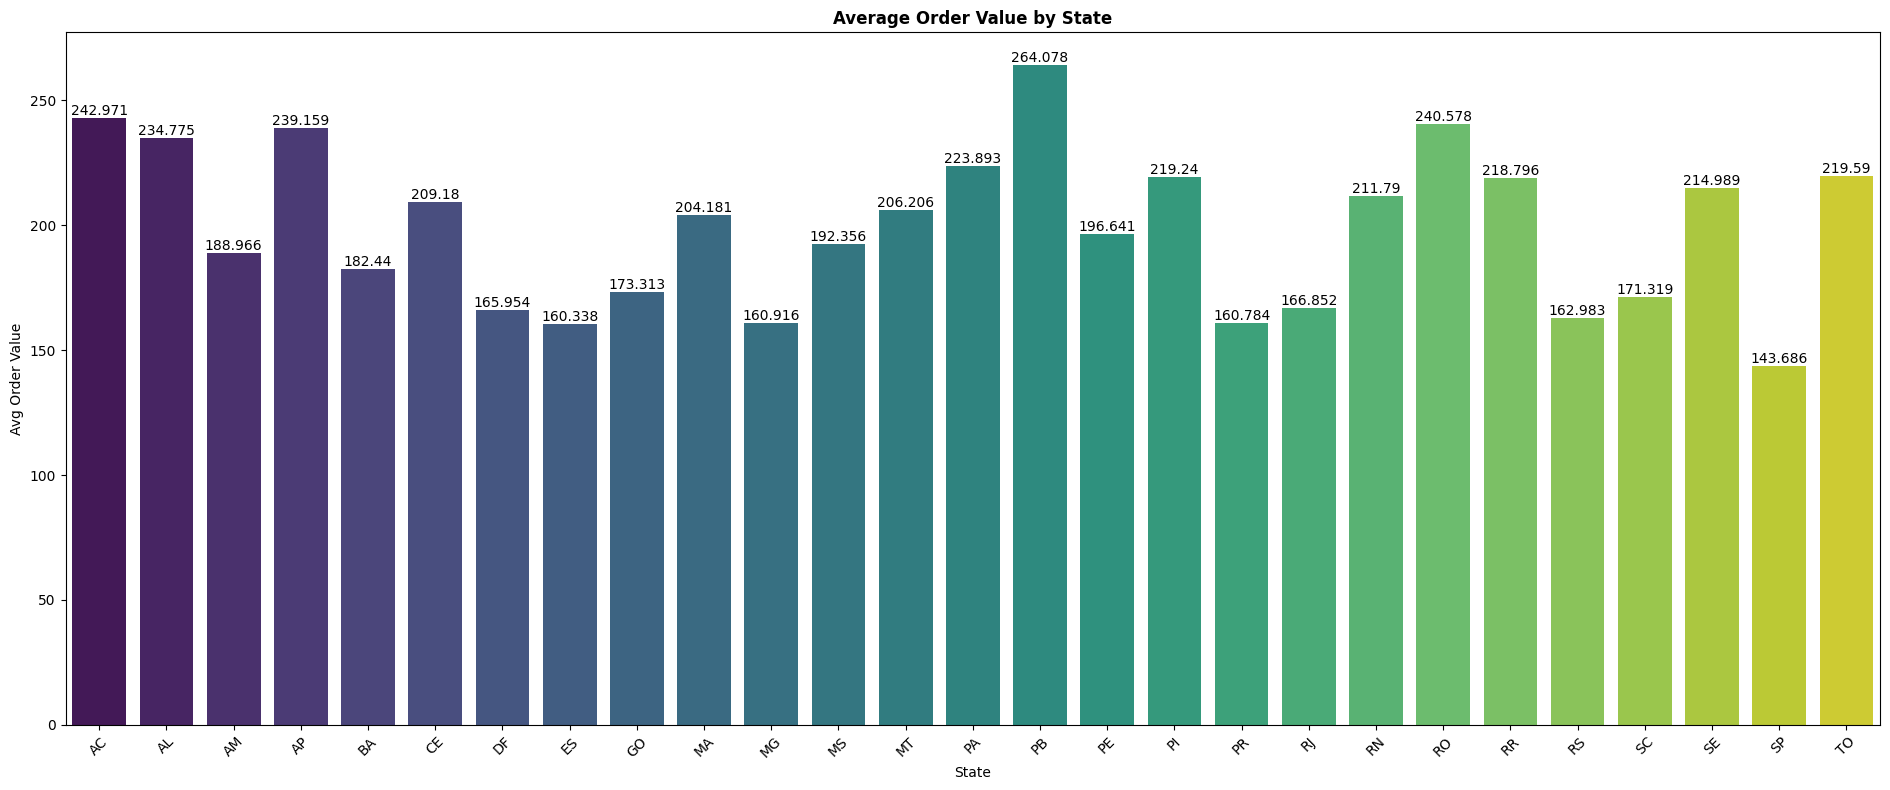

In [87]:
plt.figure(figsize=(19,8))
ax = sns.barplot(data=avg_order_value_by_state, x='customer_state', y='total_payment', palette='viridis',hue='customer_state',legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Average Order Value by State", fontweight='bold')
plt.xlabel("State")
plt.ylabel("Avg Order Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Order Value (AOV) by State – Key Insights

- **Distrito Federal (DF)** has the highest AOV (~266.6 BRL), likely due to a wealthier customer base or premium product demand.

- Other high-AOV states include **Acre (AC)**, **Amazonas (AM)**, **Alagoas (AL)**, and **Rondonia (RO)**, suggesting fewer but higher-value orders.

- **Sao Paulo (SP)**, despite leading in total sales, has a lower AOV (~142.5 BRL), pointing to frequent but smaller purchases.

- **Para (PA)**, **Pernambuco (PE)**, and **Mato Grosso (MT)** show balanced spending behavior.

- States like **Piai (PI)** and **Espirito Santo (ES)** reflect more price-sensitive buying patterns.

## Order_items, products, sellers and orders combined analysis
**This will allow us to analyse:**
- The average shipping time, on-time delivery rate and number of sellers per category
- Which product categories have the highest total sales & highest order count?
- Which categories have the highest shipping costs relative to product price? / Total shipping cost vs. product price  
- How many unique sellers operate in each product category? & how many are the top sellers?
- What are the top & bottom 10 performing product categories overall?
- The sales trend of top 5 product categories over time

In [88]:
order_items_comb = order_items.copy()

In [89]:
products_comb = products.copy()

In [90]:
orders_comb = orders.copy()

In [91]:
# 1. Connecting order items, products, and category translation
order_items_products = order_items_comb.merge(products_comb, on='product_id', how='left')

In [92]:
# 2.Joining with seller data
order_items_sellers = order_items_products.merge(sellers, on='seller_id', how='left')

In [93]:
# 3.Joining with orders data to get delivery information
full_orders_data = order_items_sellers.merge(orders_comb, on='order_id', how='left')

In [94]:
# 4.Calculating Order volume,Total sales,Total shipping costs,Average shipping time & On-time delivery by product category
category_performance = full_orders_data.groupby('product_category_name_english').agg({
    'order_id': 'count',                          
    'price': 'sum',                              
    'freight_value': 'sum',                     
    'shipping_time_days': 'mean',                
    'delivered_on_time': 'mean',                                        
}).reset_index()

In [95]:
category_performance.columns = ['product_category', 'order_count', 'total_sales', 
                               'total_freight', 'avg_shipping_days', 
                               'on_time_delivery_rate']

In [96]:
category_performance['avg_order_value'] = category_performance['total_sales'] / category_performance['order_count']

In [97]:
category_performance['freight_percentage'] = (category_performance['total_freight'] / category_performance['total_sales']) * 100

In [98]:
# calculating order volume & on-time delivery rate 
seller_category_metrics = full_orders_data.groupby(['product_category_name_english', 'seller_id']).agg({
    'order_id': 'count',                         
    'delivered_on_time': 'mean',                                   
}).reset_index()

In [99]:
# Number of sellers per category
sellers_per_category = seller_category_metrics.groupby('product_category_name_english')['seller_id'].nunique().reset_index()
sellers_per_category.columns = ['product_category', 'seller_count']

In [100]:
# Joining seller count to category performance
category_performance = category_performance.merge(sellers_per_category, on='product_category', how='left')

In [101]:
# Filtering to only include categories with sufficient amount of data
min_orders = 300
significant_categories = category_performance[category_performance['order_count'] >= min_orders]

## Number of Sellers per Category & Top seller by total Sales

In [102]:
category_metrics = significant_categories.copy()

In [103]:
most_sellers = category_metrics.sort_values('seller_count', ascending=False).head(10)

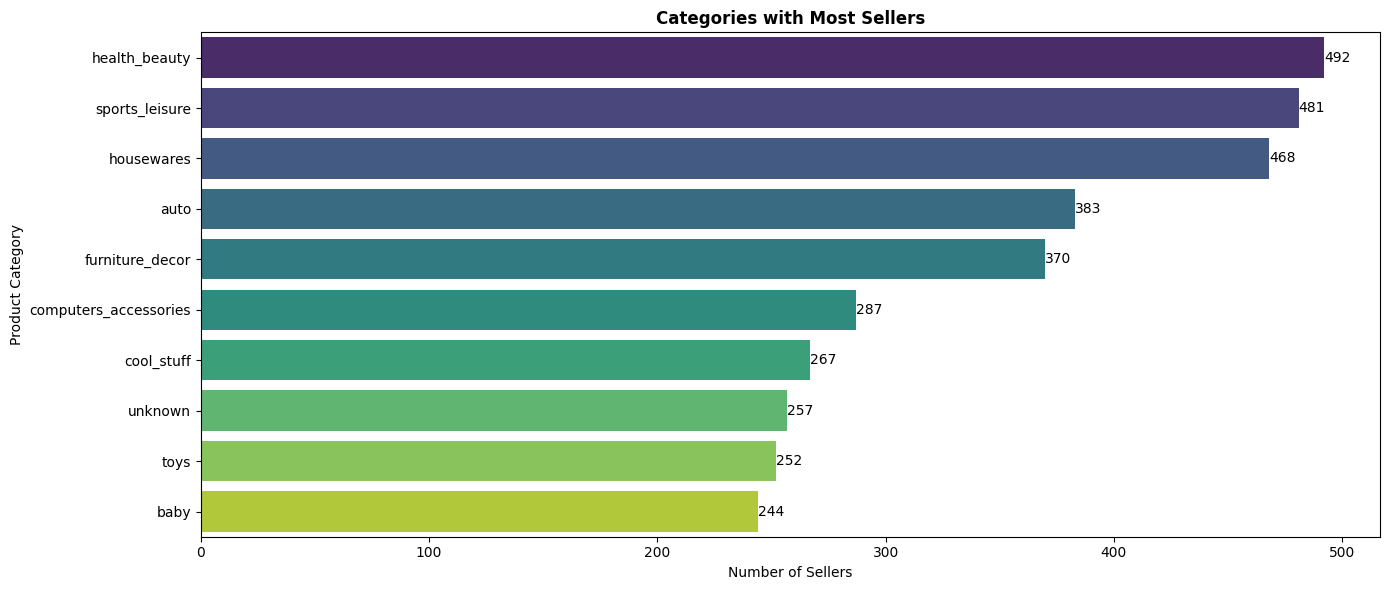

In [104]:
most_sellers = category_metrics.sort_values('seller_count', ascending=False).head(10)
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=most_sellers, x='seller_count', y='product_category', palette='viridis', hue='product_category', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Categories with Most Sellers', fontweight='bold')
plt.xlabel('Number of Sellers')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### Categories with fewest sellers - (where min orders > 300)

In [105]:
fewest_sellers = category_metrics.sort_values('seller_count').head(10)

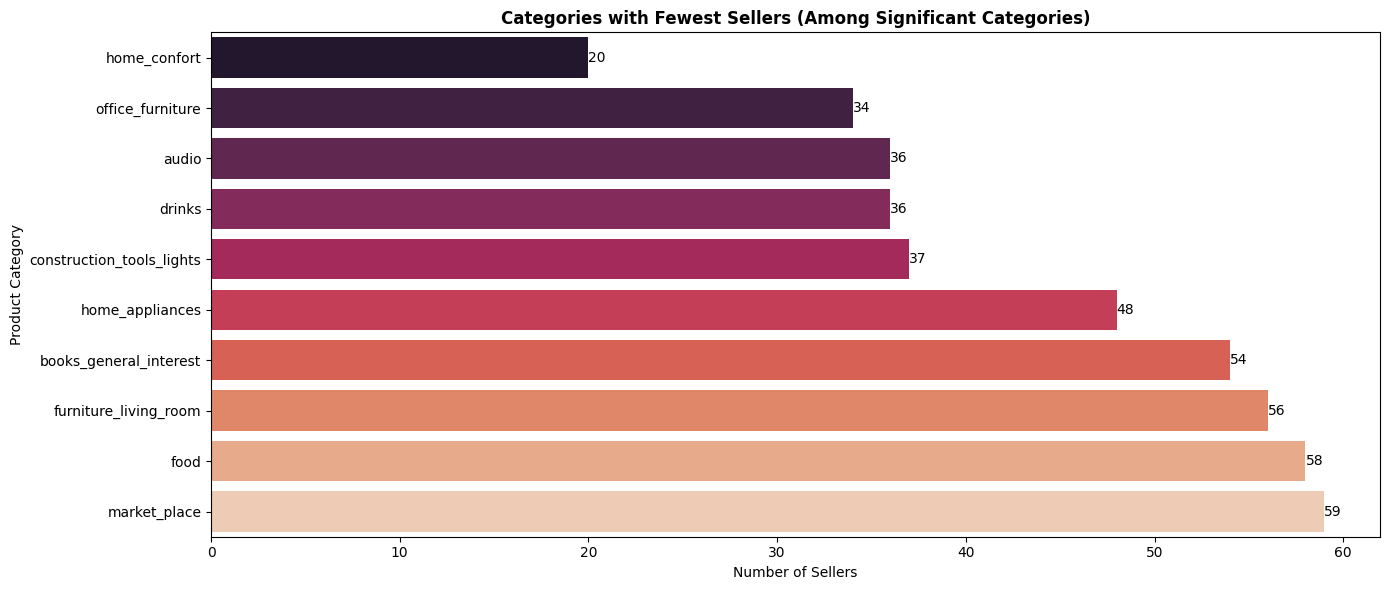

In [106]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=fewest_sellers, x='seller_count', y='product_category', palette='rocket', hue='product_category', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Categories with Fewest Sellers (Among Significant Categories)', fontweight='bold')
plt.xlabel('Number of Sellers')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [107]:
seller_analysis = full_orders_data.copy()

In [108]:
seller_sales = seller_analysis.groupby('seller_id')['price'].sum().reset_index()
seller_sales.columns = ['seller_id', 'total_sales']

In [109]:
seller_sales_sorted = seller_sales.sort_values('total_sales', ascending=False).reset_index(drop=True)

In [110]:
seller_sales_sorted.head()

,seller_id,total_sales
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89


In [111]:
total_marketplace_sales = seller_sales_sorted['total_sales'].sum()

In [112]:
seller_sales_sorted['sales_percentage'] = (seller_sales_sorted['total_sales'] / total_marketplace_sales) * 100

In [113]:
seller_sales_sorted['cumulative_percentage'] = seller_sales_sorted['sales_percentage'].cumsum()

In [114]:
seller_count = len(seller_sales_sorted)

In [115]:
seller_count

3095

In [116]:
top_1_percent_count = max(1, int(seller_count * 0.01))  # Top 1%
top_5_percent_count = max(1, int(seller_count * 0.05))  # Top 5% 
top_10_percent_count = max(1, int(seller_count * 0.10)) # Top 10%
top_20_percent_count = max(1, int(seller_count * 0.20)) # Top 20%
top_50_percent_count = max(1, int(seller_count * 0.50)) # Top 50%

In [117]:
top_1_percent_sales = seller_sales_sorted.iloc[:top_1_percent_count]['sales_percentage'].sum()
top_5_percent_sales = seller_sales_sorted.iloc[:top_5_percent_count]['sales_percentage'].sum()
top_10_percent_sales = seller_sales_sorted.iloc[:top_10_percent_count]['sales_percentage'].sum()
top_20_percent_sales = seller_sales_sorted.iloc[:top_20_percent_count]['sales_percentage'].sum()
top_50_percent_sales = seller_sales_sorted.iloc[:top_50_percent_count]['sales_percentage'].sum()

In [118]:
top_sellers_data = pd.DataFrame({
    'seller_group': ['Top 1%', 'Top 5%', 'Top 10%', 'Top 20%', 'Top 50%'],
    'sales_percentage': [top_1_percent_sales, top_5_percent_sales, top_10_percent_sales, 
                         top_20_percent_sales, top_50_percent_sales]
})

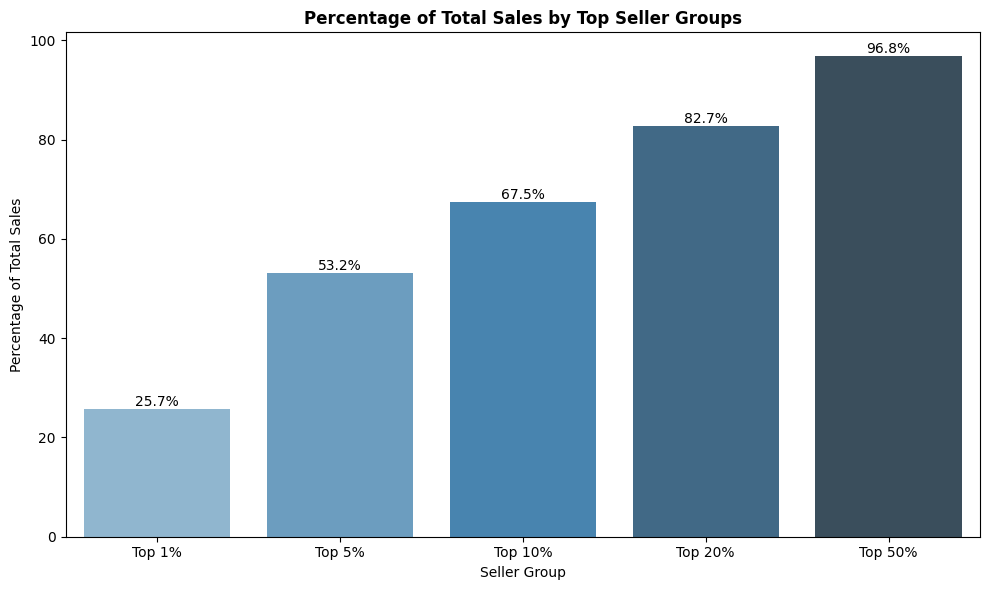

In [119]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_sellers_data, x='seller_group', y='sales_percentage', palette='Blues_d',hue='seller_group',legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')    
plt.title('Percentage of Total Sales by Top Seller Groups', fontweight='bold')
plt.xlabel('Seller Group')
plt.ylabel('Percentage of Total Sales')
plt.tight_layout()
plt.show()

In [120]:
print(f"Total number of sellers: {seller_count}")
print(f"Top 1% of sellers ({top_1_percent_count} sellers) generate {top_1_percent_sales:.1f}% of total sales")
print(f"Top 5% of sellers ({top_5_percent_count} sellers) generate {top_5_percent_sales:.1f}% of total sales")
print(f"Top 10% of sellers ({top_10_percent_count} sellers) generate {top_10_percent_sales:.1f}% of total sales")
print(f"Top 20% of sellers ({top_20_percent_count} sellers) generate {top_20_percent_sales:.1f}% of total sales")
print(f"Top 50% of sellers ({top_50_percent_count} sellers) generate {top_50_percent_sales:.1f}% of total sales")

Total number of sellers: 3095
Top 1% of sellers (30 sellers) generate 25.7% of total sales
Top 5% of sellers (154 sellers) generate 53.2% of total sales
Top 10% of sellers (309 sellers) generate 67.5% of total sales
Top 20% of sellers (619 sellers) generate 82.7% of total sales
Top 50% of sellers (1547 sellers) generate 96.8% of total sales


### Average Shipping Time by Category (Top 10 Fastest and Top 10 Slowest)

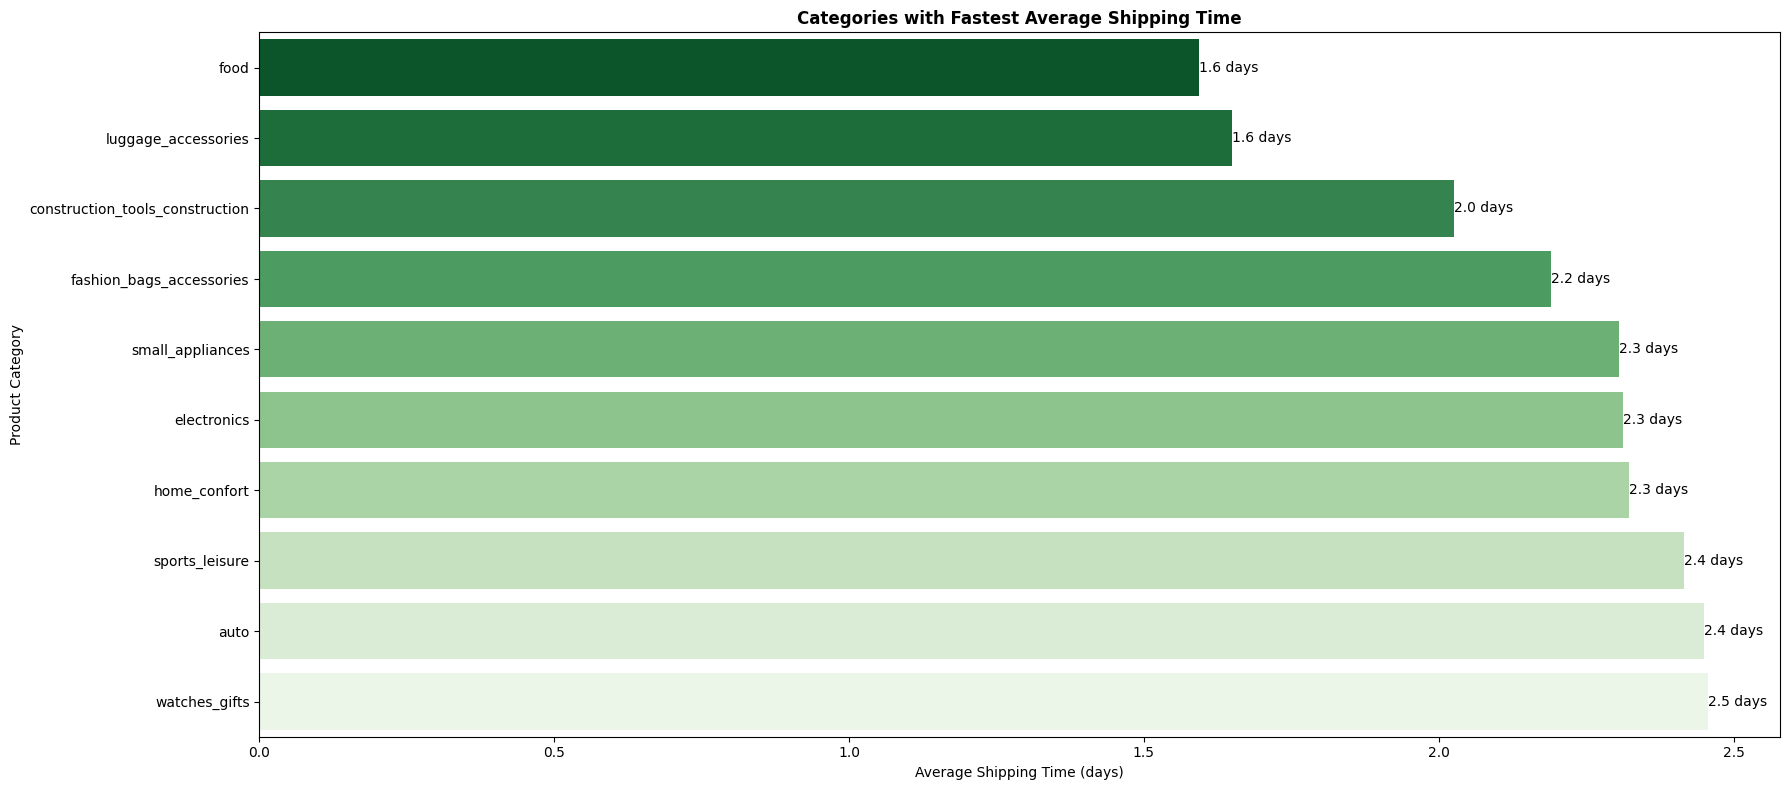

In [121]:
fastest_shipping = category_metrics.sort_values('avg_shipping_days').head(10)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=fastest_shipping, x='avg_shipping_days', y='product_category', palette='Greens_r', hue='product_category', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f days')
plt.title('Categories with Fastest Average Shipping Time', fontweight='bold')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

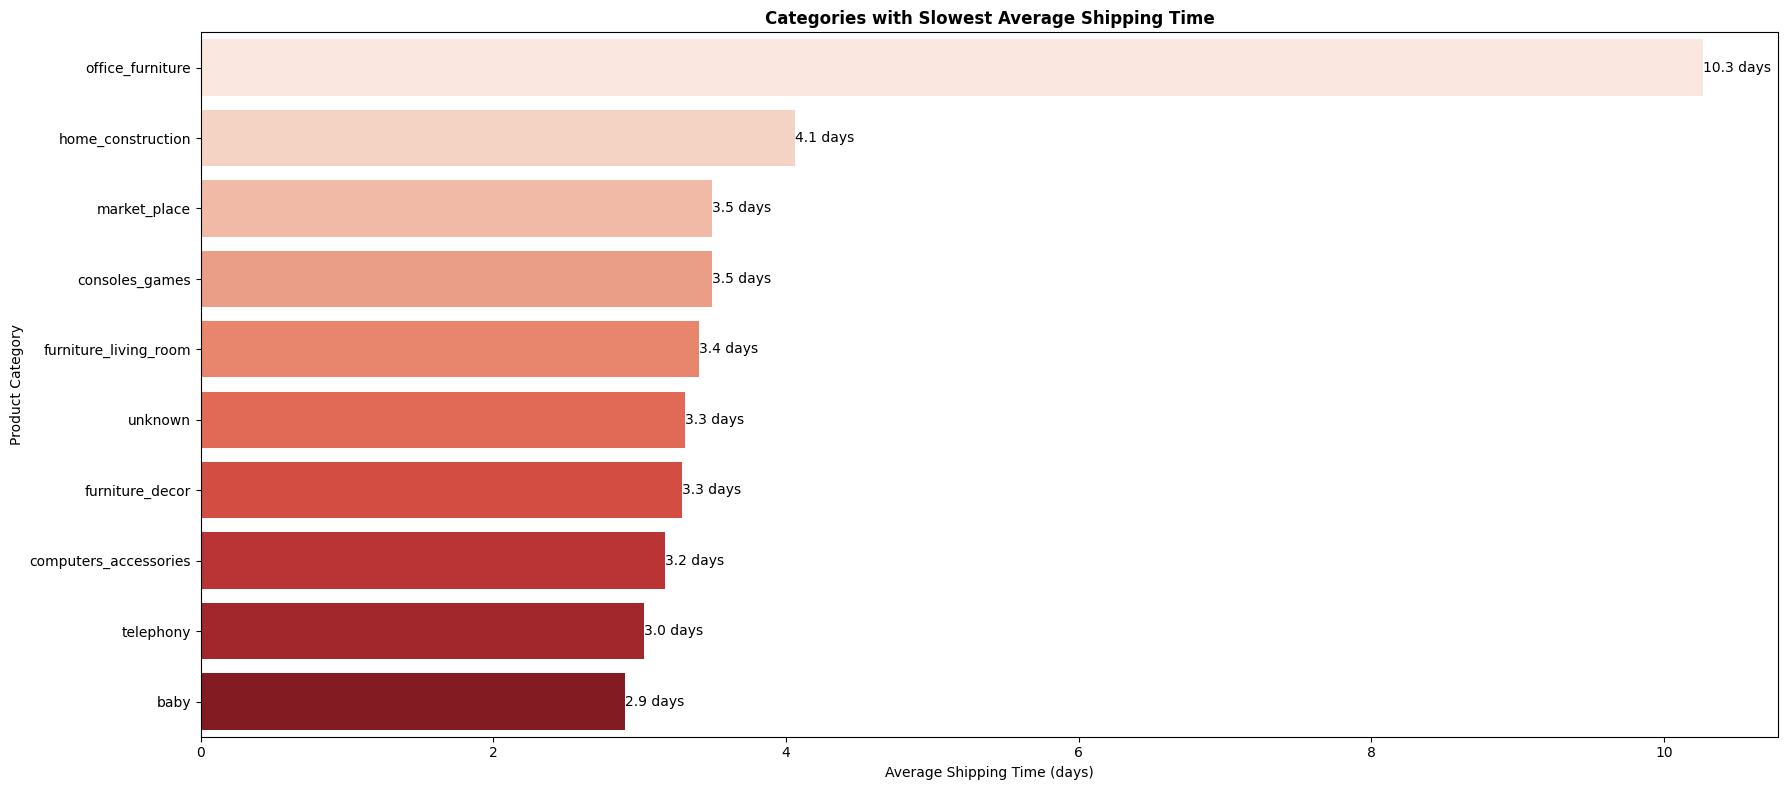

In [122]:
slowest_shipping = category_metrics.sort_values('avg_shipping_days', ascending=False).head(10)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=slowest_shipping, x='avg_shipping_days', y='product_category', palette='Reds', hue='product_category', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f days')
plt.title('Categories with Slowest Average Shipping Time', fontweight='bold')
plt.xlabel('Average Shipping Time (days)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

## Top & Bottom 10 Product Categories by Total Sales

In [123]:
top_categories_by_sales = significant_categories.sort_values('total_sales', ascending=False).head(10)

In [124]:
top_categories_by_sales.head()

,product_category,order_count,total_sales,total_freight,avg_shipping_days,on_time_delivery_rate,avg_order_value,freight_percentage,seller_count
43,health_beauty,9670,1258681.34,182566.73,2.661899,0.911272,130.163531,14.504603,492
72,watches_gifts,5991,1205005.68,100535.93,2.455973,0.919045,201.135984,8.343191,101
7,bed_bath_table,11115,1036988.68,204693.04,2.775412,0.917229,93.296327,19.739178,196
66,sports_leisure,8641,988048.97,168607.51,2.416159,0.927662,114.344285,17.064692,481
15,computers_accessories,7827,911954.32,147318.08,3.171624,0.924109,116.513903,16.154107,287


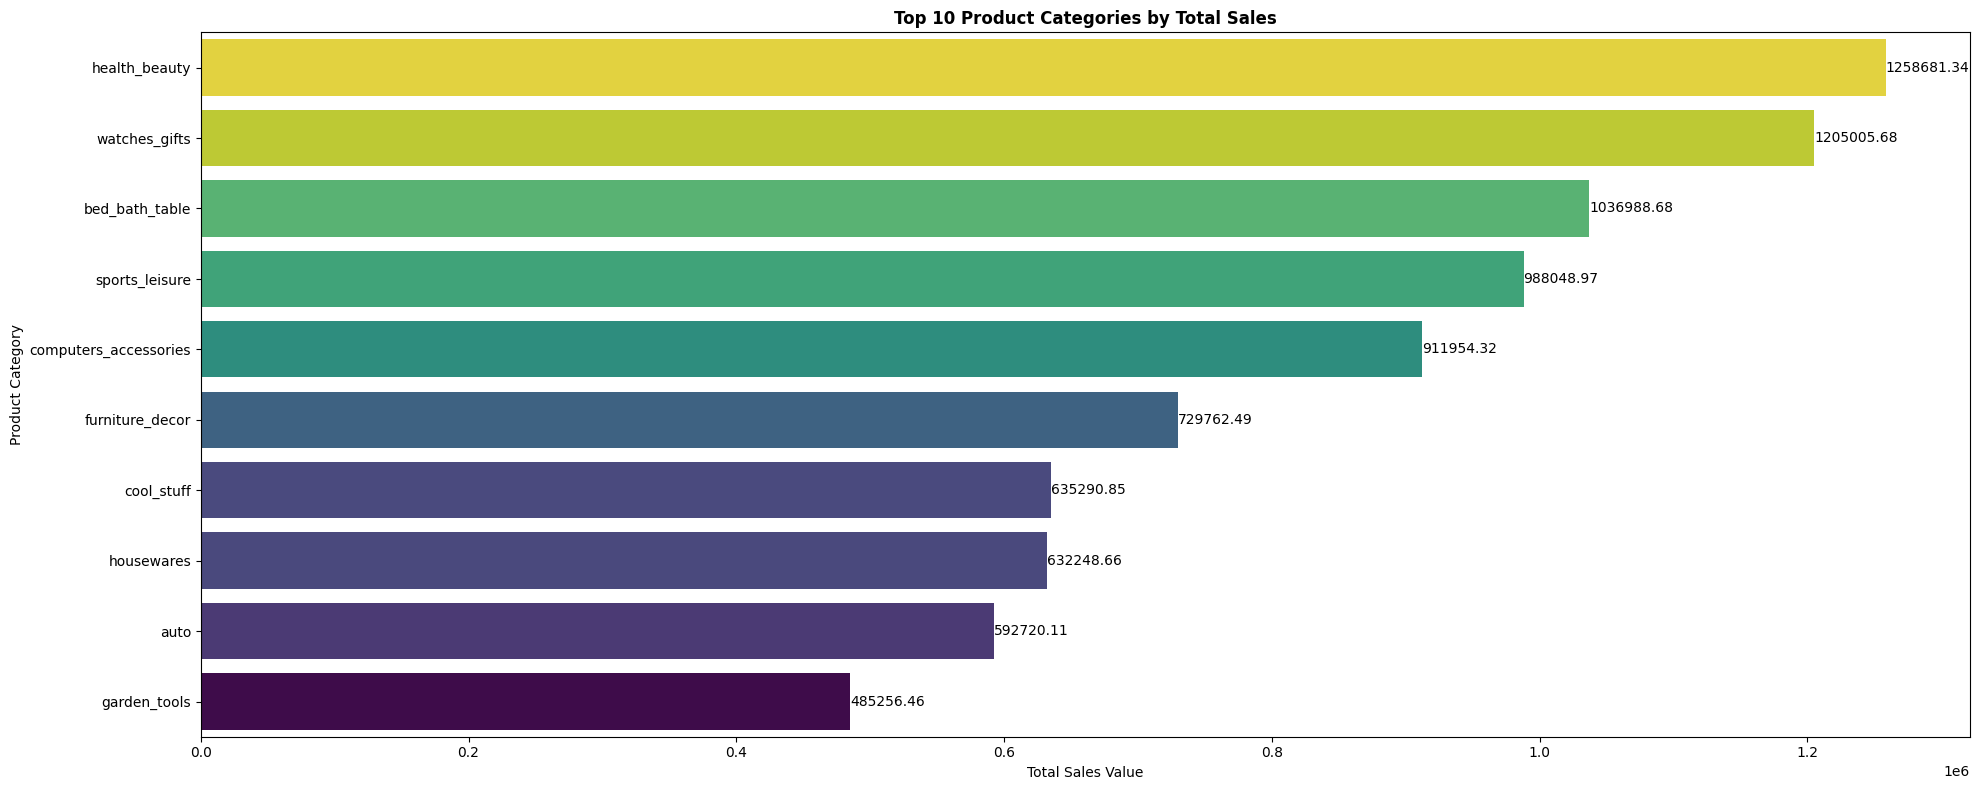

In [125]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=top_categories_by_sales, x='total_sales', y='product_category', palette='viridis', hue='total_sales', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Top 10 Product Categories by Total Sales', fontweight='bold')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### Top 10 Product Categories by Total Sales Key Insights

1. **Market Leaders**:
   - Health_beauty is the top-selling category, showing strong consumer demand, likely driven by personal care, grooming, and wellness trends.
   - Watches_gifts follows closely, suggesting a high value-per-item segment with frequent gifting or premium purchases.
2. **Core Utility Categories**:
   - Categories like bed_bath_table, housewares and furniture_decor reflect consistent household demand. These are essential lifestyle-driven segments.
3. **Leisure & Lifestyle Appeal**:
   - sports_leisure, cool_stuff, and auto show significant traction, possibly linked to increasing discretionary income and hobby-based spending.
4. **Tech & Accessories**:
   - computers_accessories performs solidly — indicating a tech-conscious customer base, possibly driven by remote work or gadget upgrades.
5. **Green Trend**:
   - garden_tools being in the top 10 suggests a rising interest in gardening or home improvement, hinting at evolving consumer hobbies.


In [126]:
bottom_categories_by_sales = significant_categories.sort_values('total_sales').head(10)

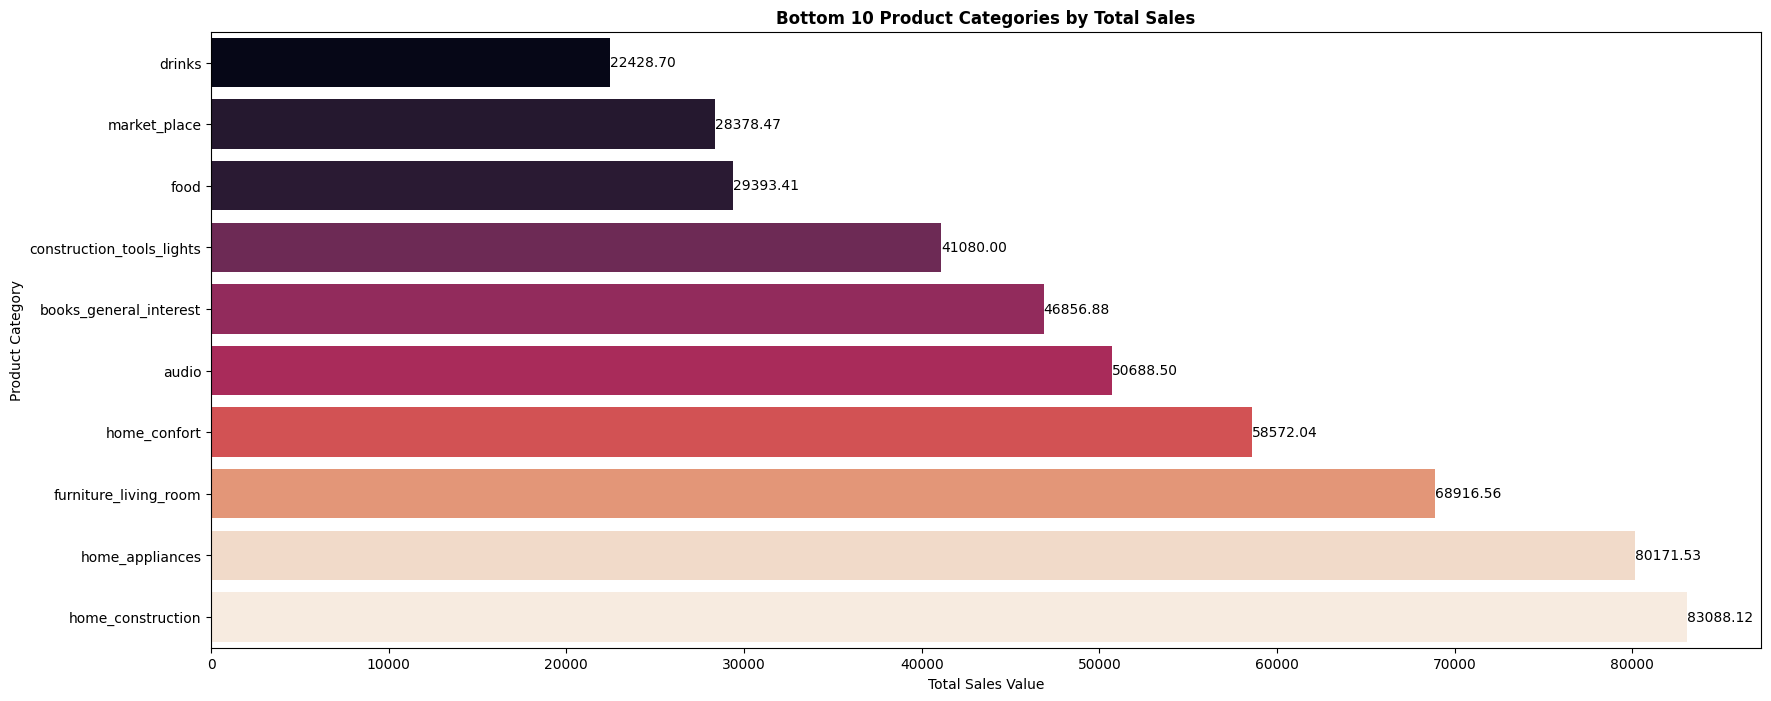

In [127]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=bottom_categories_by_sales, x='total_sales', y='product_category', palette='rocket', hue='total_sales', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.title('Bottom 10 Product Categories by Total Sales', fontweight='bold')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()

### Bottom 10 Product Categories by Total Sales - Key Insights

1. **Low Demand or Niche Categories**:
   - Drinks, market_place, and food record the lowest total sales. These may be low-ticket items, perishable goods, or categories with limited product range or consumer trust in online purchases.
2. **Construction & Home Segments Lagging**:
   - Construction_tools_lights, home_confort, home_construction, and furniture_living_room show relatively low sales, possibly due to:
     - High-touch requirements (people prefer offline for bulky or custom items).
     - Logistic constraints or longer delivery cycles.
     - High-value items with longer decision cycles.
3. **Entertainment & Lifestyle Slow Movers**:
   - Audio and books general interest may suffer from digital alternatives (streaming, eBooks) or lack of urgency in purchase behavior.
4. **Mid-tier Potential**:
   - Despite being in the bottom 10, categories like home_appliances and furniture_living_room still generate upwards of ₹80,000 and ₹68,000 in sales respectively, indicating a base for growth through better targeting, bundled offerings, or financing options.

## Top & Bottom 10 Product Categories by Order Count 

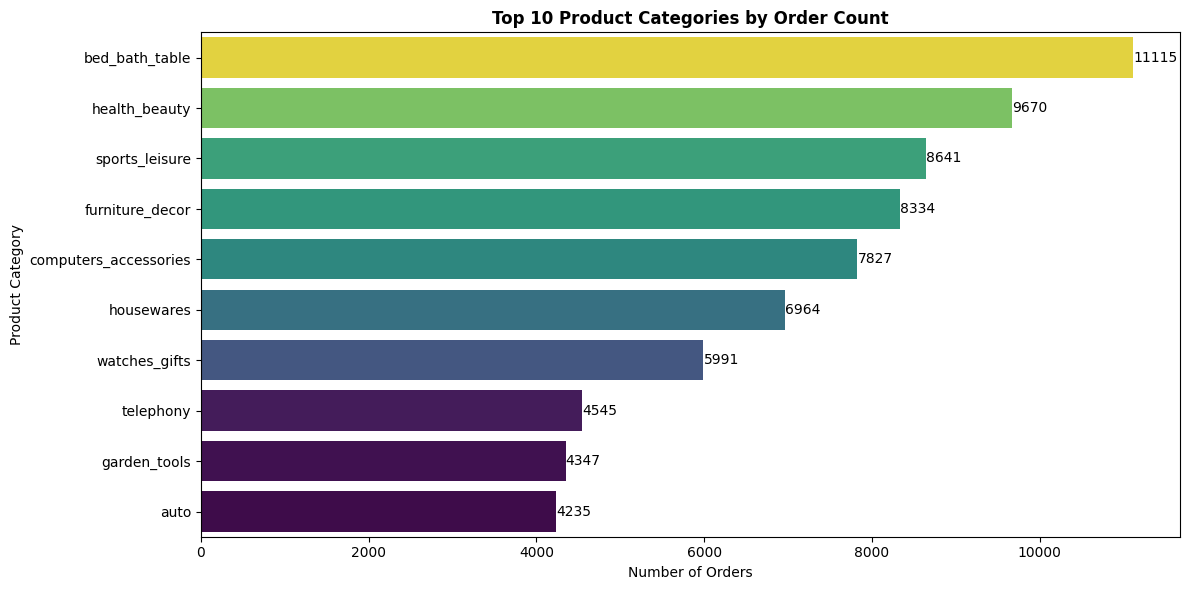

In [128]:
top_categories_by_orders = significant_categories.sort_values('order_count', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_categories_by_orders, x='order_count', y='product_category', palette='viridis', hue='order_count', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 Product Categories by Order Count', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [129]:
bottom_categories_by_orders = significant_categories.sort_values('order_count').head(10)

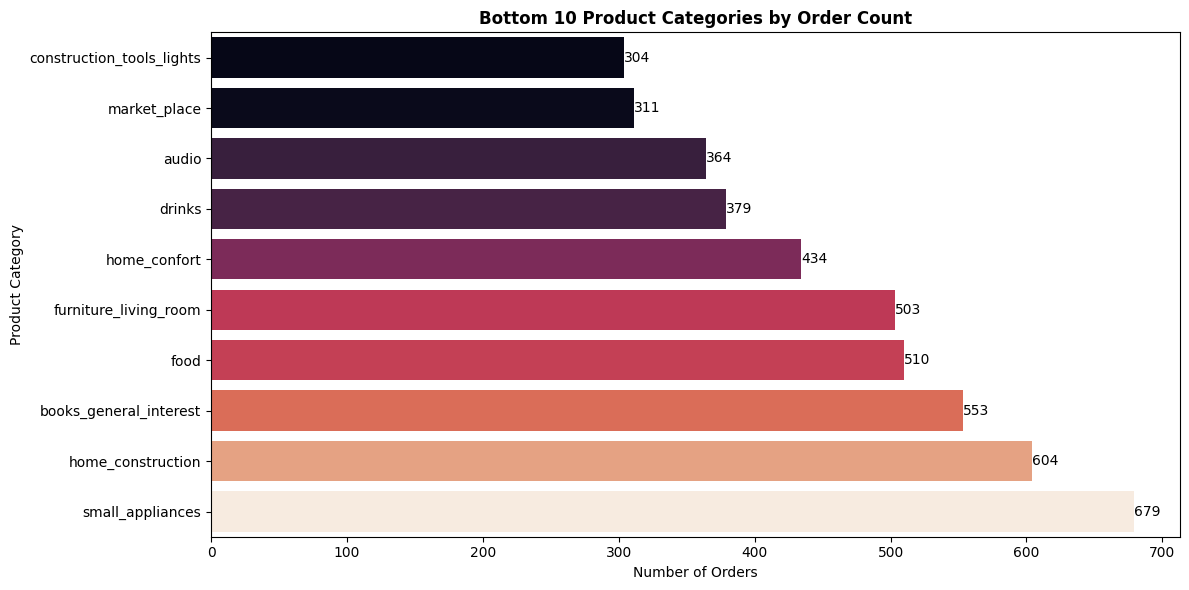

In [130]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_categories_by_orders, x='order_count', y='product_category', palette='rocket', hue='order_count', legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bottom 10 Product Categories by Order Count', fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

### The Top 10 & Bottom 10 product categories by order count
- They both follow the same pattern of Top 10 & Bottom 10 product categories by total sales.

## Total shipping cost vs. product price  

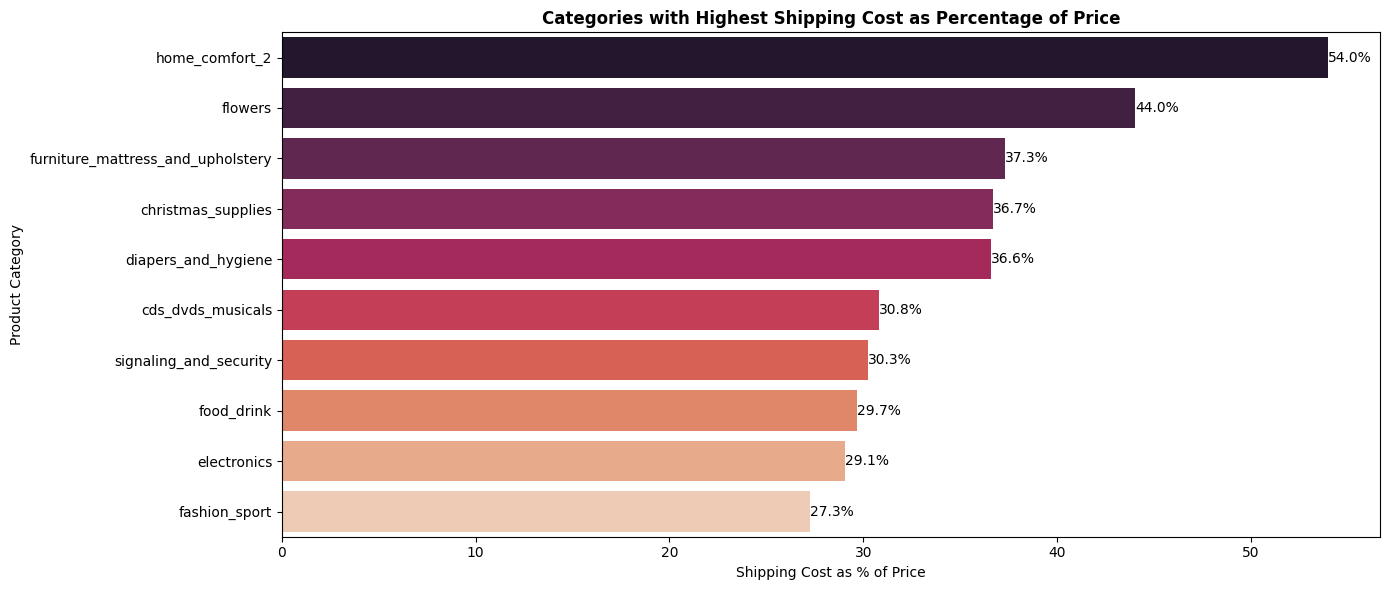

In [131]:
shipping_cost_pct = category_performance.sort_values('freight_percentage', ascending=False).head(10)
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=shipping_cost_pct, x='freight_percentage', y='product_category', palette='rocket', hue='product_category', legend=False)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
plt.title('Categories with Highest Shipping Cost as Percentage of Price', fontweight='bold')
plt.xlabel('Shipping Cost as % of Price')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

## Key Insights - Categories with Highest Shipping Cost as Percentage of Price
1. **High Shipping-Cost-to-Price Ratio Products**:
   - Home comfort (54%) and flowers (44%) have significantly high shipping costs relative to their price.
   - These may include low-cost but bulky, delicate, or perishable products, which increase logistics expenses.
2. **Low Value, High Handling Items**:
   - Categories like christmas supplies, diapers and hygiene, and cds-dvds musicals show high shipping percentages (30–37%).
   - These items tend to have low product value but require special handling or packaging.
3. **Noteworthy High-Volume Categories**:
   - Electronics (29.1%) and fashion_sport (27.3%) are commonly purchased but still show elevated shipping cost ratios.
   - Likely due to heavier packaging needs, security requirements, or frequent returns.

## Sales trends of top 5 product categories over time

In [132]:
full_orders_data['order_date'] = full_orders_data['order_purchase_timestamp'].dt.to_period('M')

In [133]:
order_level_sales = full_orders_data.groupby(['order_id', 'order_date', 'product_category_name_english'])['price'].sum().reset_index()

In [134]:
category_sales_over_time = order_level_sales.groupby(['order_date', 'product_category_name_english'])['price'].sum().reset_index()
category_sales_over_time.columns = ['order_date', 'product_category', 'sales']

In [135]:
category_sales_over_time['order_date'] = category_sales_over_time['order_date'].astype(str)

In [136]:
count = category_sales_over_time['product_category'].unique()

In [137]:
len(count) #cross checking the number of product categories

73

In [138]:
top_5_categories = top_categories_by_sales['product_category'].head(5).tolist()

In [139]:
top_5_sales_over_time = category_sales_over_time[category_sales_over_time['product_category'].isin(top_5_categories)]

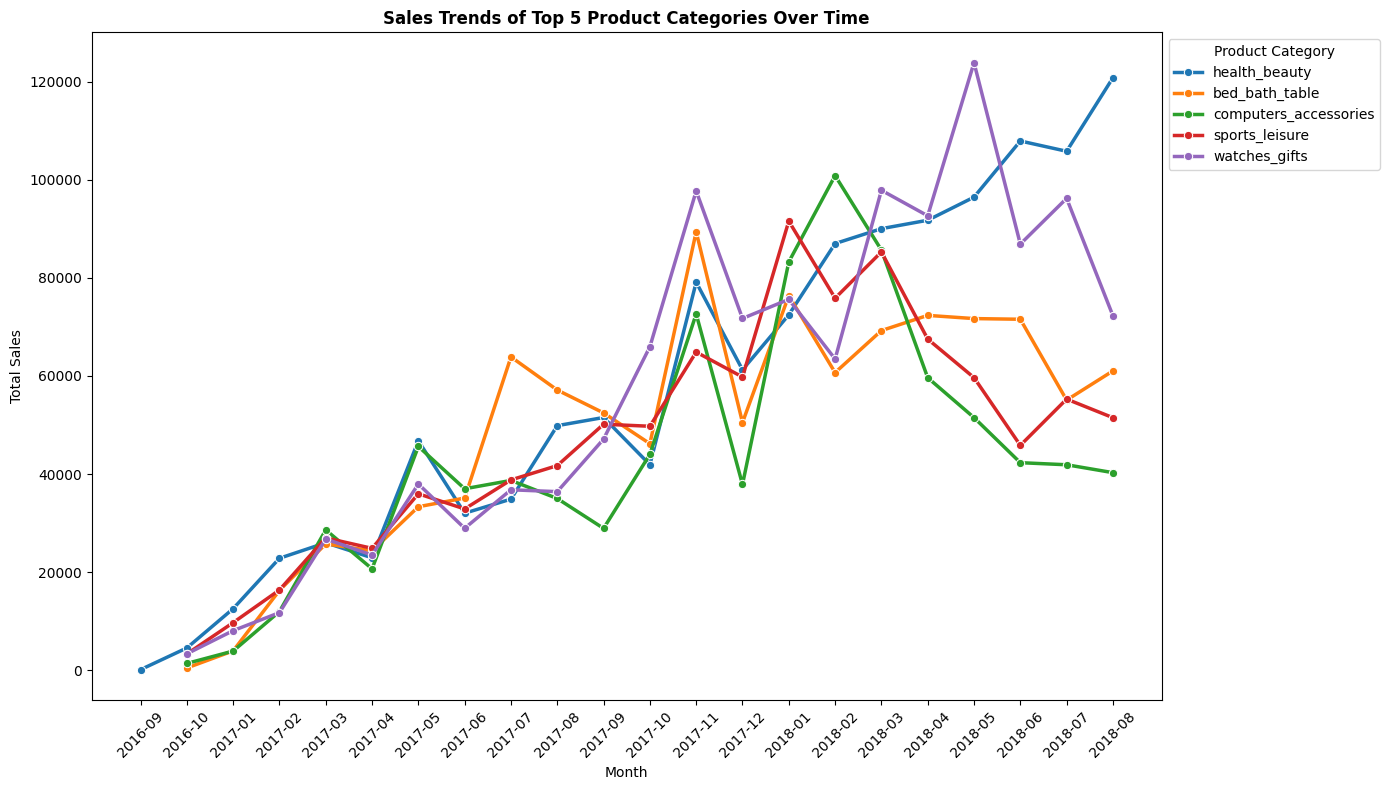

In [140]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_5_sales_over_time, x='order_date', y='sales', hue='product_category', marker='o', linewidth=2.5)
plt.title('Sales Trends of Top 5 Product Categories Over Time', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Key Insights from Sales Trends of Top 5 Product Categories

1. **Health & Beauty – Consistent Growth Leader**  
   - Health beauty consistently outperforms all other categories after mid-2017, peaking near Aug 2018.
   - Indicates strong and rising consumer demand, likely due to repeat purchases and increased online trust in personal care products.
2. **Watches & Gifts – Seasonal Peaks**  
   - Watches gifts show strong spikes during November–January, hinting at seasonal shopping (possibly Black Friday, Christmas, and New Year gifting).
   - Great potential for targeted holiday promotions.
3. **Bed, Bath & Table – Early Surge, Later Plateau**  
   - Initially saw a strong rise in sales until early 2018, but then plateaued and showed a slight decline.
   - May indicate market saturation or lack of new product introductions.
4. **Computers & Accessories – Volatile Trends**  
   - Computers accessories saw sharp rises and drops, especially after late 2017.
   - High price sensitivity and occasional bulk buying might explain the inconsistency.
5. **Sports & Leisure – Mid-Level Performer**  
   - Stable but moderate performance, with brief upticks. Likely influenced by seasonal interest or promotional periods (e.g., New Year fitness goals).
6. **Strategic Implications**:  
   - health_beauty and watches_gifts are ideal for scaling and seasonal marketing respectively.  
   - Categories like computers_accessories may need better demand forecasting and bed-bath table could benefit from product refreshes.


## Order & Review 
This connects each order with it's review data, enabling to:
- **Distribution of Review Scores**  
- **Calculate satisfaction rates by delivery time**  
- **Average Review score over time**  

In [141]:
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'])

In [142]:
order_reviews['review_score'].value_counts().sort_index()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

In [143]:
average_score = order_reviews['review_score'].mean()

In [144]:
print(f"Average review score: {average_score:.2f} out of 5")

Average review score: 4.09 out of 5


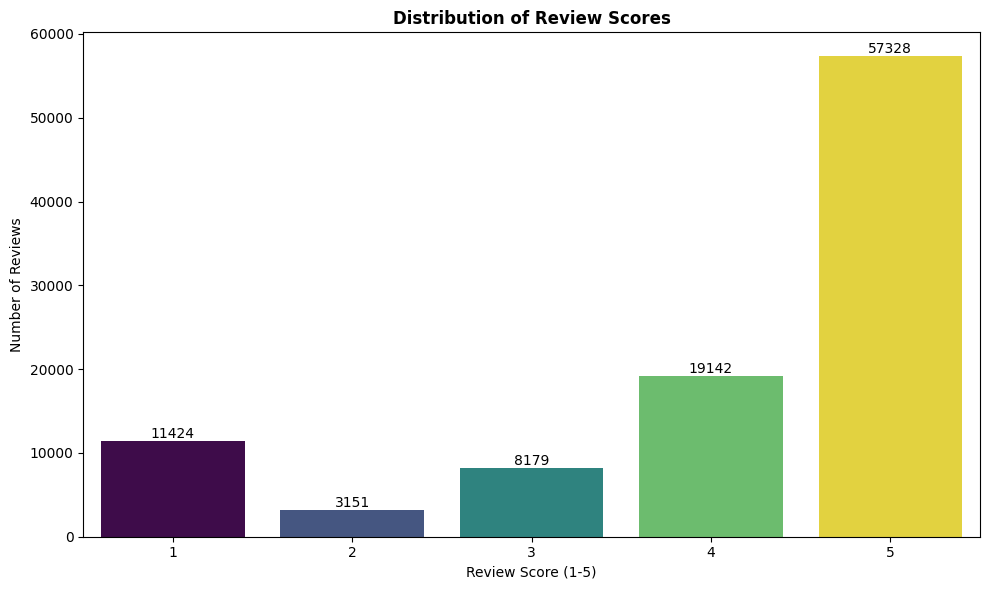

In [145]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=order_reviews, x='review_score', palette='viridis',hue='review_score',legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of Review Scores', fontweight='bold')
plt.xlabel('Review Score (1-5)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

- **We can understand that a sizable chuck of the products have good reviews (4 & 5 stars) - 76,470 reviews**
- **There are certain products who have bad reviews ( 1 & 2 stars) - 14,575**
- **The number of 3 star reviews are 8179 wich reflect that the products are good but with certain flaws.** 

In [146]:
orders_r = orders.copy()
# using a copy of orders_r to avoid clustering of data together for futher analysis

In [147]:
# Connecting reviews with orders data to analyze satisfaction by delivery performance
reviews_orders = order_reviews.merge(orders_r, on='order_id', how='left')

### Checking if on-time delivery affects review scores

In [148]:
reviews_delivery = reviews_orders.groupby('delivered_on_time')['review_score'].mean().reset_index()
reviews_delivery['delivered_on_time'] = reviews_delivery['delivered_on_time'].map({0: 'Late', 1: 'On Time'})

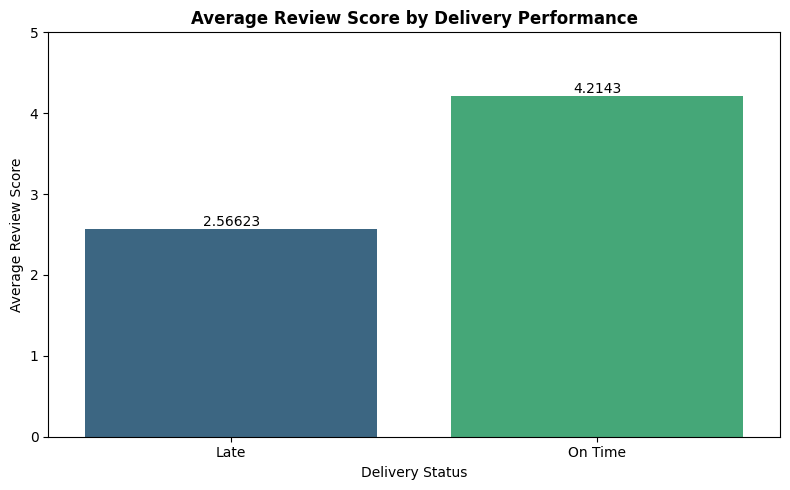

In [149]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=reviews_delivery, x='delivered_on_time', y='review_score', palette='viridis', hue='delivered_on_time',legend=False)
for container in ax.containers: 
    ax.bar_label(container)
plt.title('Average Review Score by Delivery Performance', fontweight='bold')
plt.xlabel('Delivery Status')
plt.ylabel('Average Review Score')
plt.ylim(0, 5) 
plt.tight_layout()
plt.show()

- **We can understand that majority of the products that got delivered on time have an average of good reviews so delivery time does impact the reviews from customers.**

In [150]:
delivery_review_table = pd.crosstab(
    reviews_orders['review_score'], 
    reviews_orders['delivered_on_time'],
    normalize='all'  # Show as percentage of total
) * 100

In [151]:
delivery_review_table.columns = ['Late Delivery', 'On-Time Delivery']

In [152]:
delivery_review_table.head()

,Late Delivery,On-Time Delivery
review_score,,
1,3.581867,7.931709
2,0.610752,2.564955
3,0.882869,7.360263
4,0.961480,18.330612
5,1.723408,56.052085


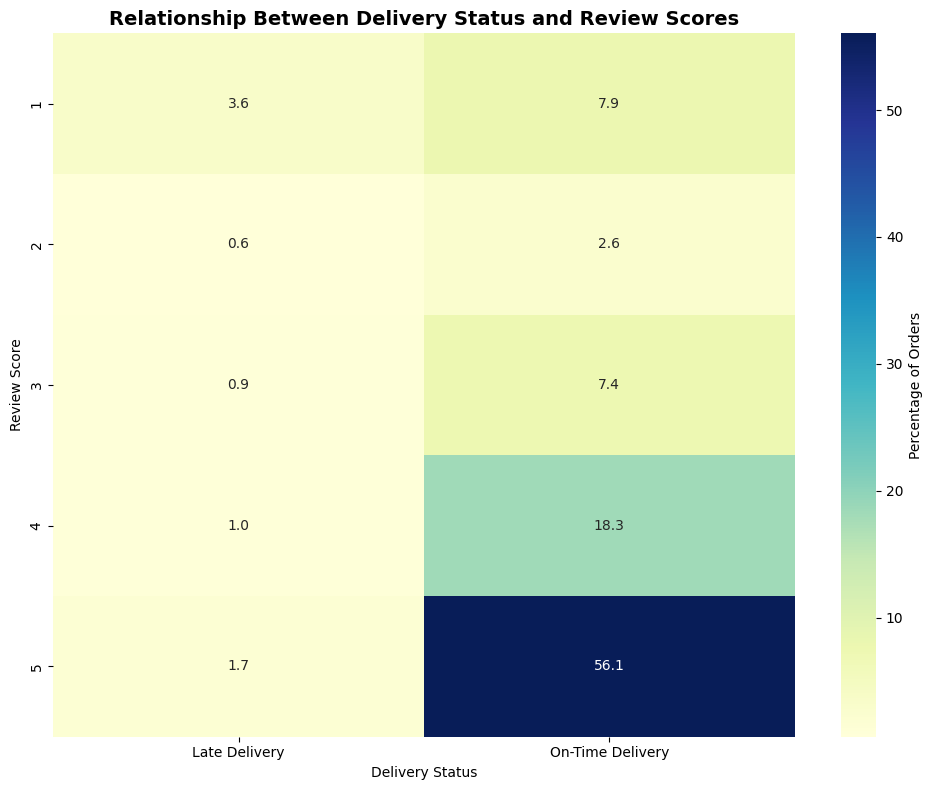

In [153]:
plt.figure(figsize=(10, 8))
sns.heatmap(delivery_review_table, annot=True, fmt='.1f', cmap='YlGnBu', 
            cbar_kws={'label': 'Percentage of Orders'})
plt.title('Relationship Between Delivery Status and Review Scores', fontweight='bold', fontsize=14)
plt.xlabel('Delivery Status')
plt.ylabel('Review Score')
plt.tight_layout()
plt.show()

## Key Findings from Delivery vs. Review Score Analysis

**On-Time Delivery Dominates 5-Star Reviews**
- 57.4% of all orders were both delivered on time and received a perfect 5-star review, representing the largest segment by far.
**Higher Ratings with On-Time Delivery**
For orders delivered on time (right column in the heatmap):
- 57.4% received 5-star reviews  
- 18.7% received 4-star reviews  
- 7.4% received 3-star reviews  
**Late Deliveries Receive Lower Ratings**
For late deliveries (left column in the heatmap):
- Only 1.8% received 5-star reviews  
- The highest percentage (3.7%) received 1-star reviews  
**Review Distribution Pattern**
There is a notable gradient:
- On-time deliveries cluster toward higher ratings  
- Late deliveries trend toward lower ratings  
**Overall Impact**
- A total of 92.0% of on-time deliveries received 4 or 5 stars (18.7% + 57.4%)  
- Only 2.8% of late deliveries received 4 or 5 stars (1.0% + 1.8%)  

### How review scores change over time

In [154]:
order_reviews['review_month'] = order_reviews['review_creation_date'].dt.to_period('M')
monthly_scores = order_reviews.groupby('review_month')['review_score'].mean().reset_index()
monthly_scores['review_month'] = monthly_scores['review_month'].astype(str)

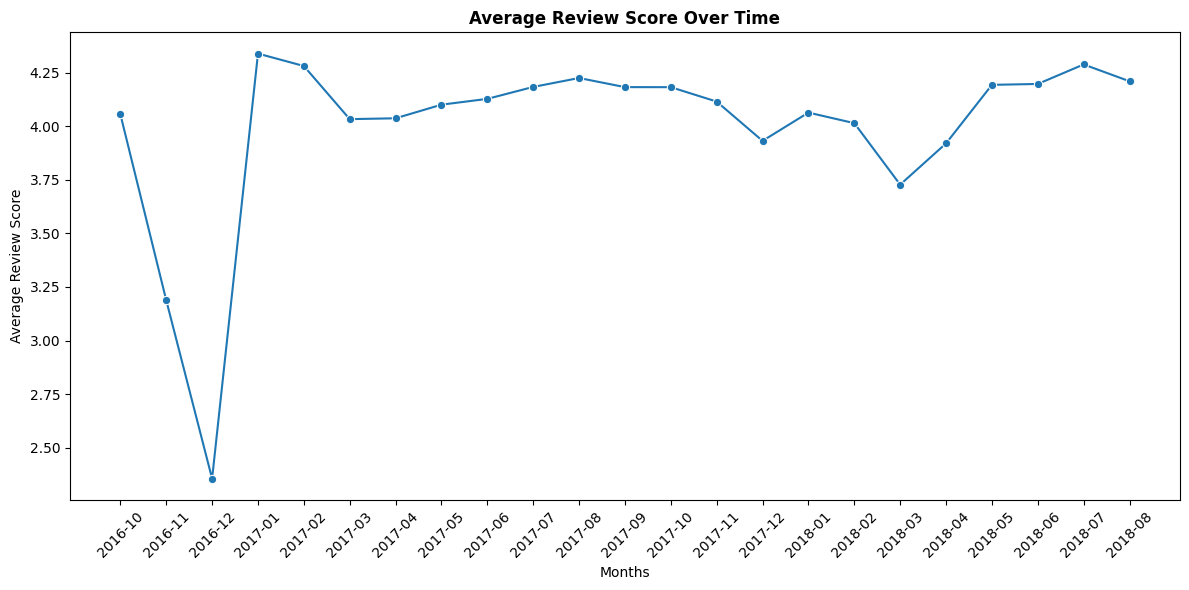

In [155]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_scores, x='review_month', y='review_score', marker='o')
plt.title('Average Review Score Over Time', fontweight='bold')
plt.xlabel('Months')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average Review Score Over Time
The graph tracks the **monthly average of customer review scores** from **October 2016 to August 2018**.

- **October 2016** started strong with an average score **above 4.0**, indicating high customer satisfaction.  
- However, there was a **sharp decline from November to December 2016**, with scores **dropping below 2.5** — possibly due to a service disruption, holiday season delays, or logistics issues.
- From **January 2017**, the average review score **quickly rebounded above 4.0** and remained relatively stable and high throughout most of 2017.
- There are **minor fluctuations** from **mid-2017 to mid-2018**, with occasional dips, but the overall trend suggests **consistently good service quality** after the initial recovery.
- The appears that the issues that caused the dip were addressed effectively, maintaining **customer satisfaction above 4.0** for most of the observed period.

## Order_reviews & Order_Items
- **Analyze Top 10 & Bottom 10 product categories according to reviews**

In [156]:
order_items_r = order_items.copy()

In [157]:
products_r = products.copy()

In [158]:
# using a copy of orders items and products to avoid clustering of data together for futher analysis

In [159]:
# Connecting reviews with order items and products
reviews_with_products = order_reviews.merge(order_items_r, on='order_id', how='left')
reviews_with_products = reviews_with_products.merge(products_r, on='product_id', how='left')

### Calculating average review score by product category

In [160]:
category_reviews = reviews_with_products.groupby('product_category_name_english')['review_score'].agg(['mean', 'count']).reset_index()

In [161]:
category_reviews = category_reviews.rename(columns={'mean': 'avg_score', 'count': 'review_count'})

In [162]:
category_reviews.head()

,product_category_name_english,avg_score,review_count
0,agro_industry_and_commerce,4.000000,212
1,air_conditioning,3.969178,292
2,art,3.937198,207
3,arts_and_craftmanship,4.125000,24
4,audio,3.825485,361


In [163]:
# Filtering to include only categories with 30 as the minimum number of reviews
min_reviews = 30
category_reviews_filtered = category_reviews[category_reviews['review_count'] >= min_reviews]

In [164]:
category_reviews_sorted = category_reviews_filtered.sort_values('avg_score')

In [165]:
category_reviews_sorted.head()

,product_category_name_english,avg_score,review_count
23,diapers_and_hygiene,3.256410,39
57,office_furniture,3.493183,1687
30,fashion_male_clothing,3.641221,131
34,fixed_telephony,3.683206,262
59,party_supplies,3.767442,43


In [166]:
# filtering top 10 and bottom 10 categories by average review
bottom_10 = category_reviews_sorted.head(10)
top_10 = category_reviews_sorted.tail(10).iloc[::-1] 

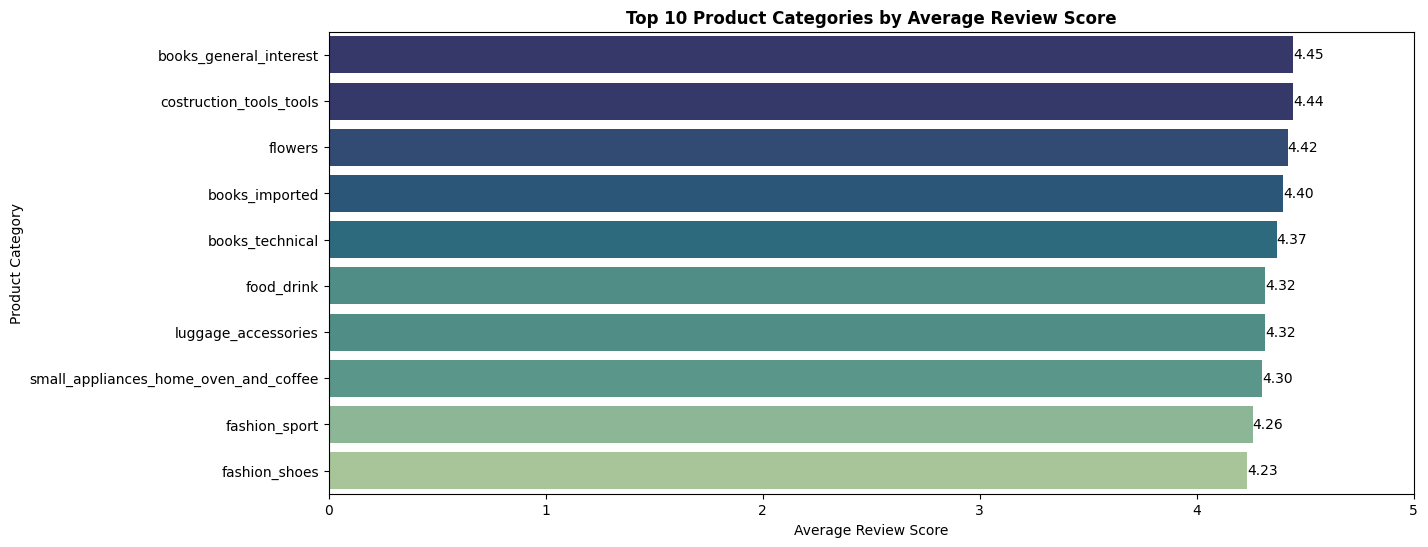

In [167]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=top_10, x='avg_score', y='product_category_name_english',palette='crest', hue='avg_score',legend=False)
for container in ax.containers: 
    ax.bar_label(container,fmt='%.2f')
plt.title('Top 10 Product Categories by Average Review Score', fontweight='bold')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.xlim(0, 5)  
plt.show()

### Top 10 Best Product Categories by Average Review Score
- We can understand that these are the top 10 product categories with the highest average review scores, filtered to include only those with at least 30 reviews.

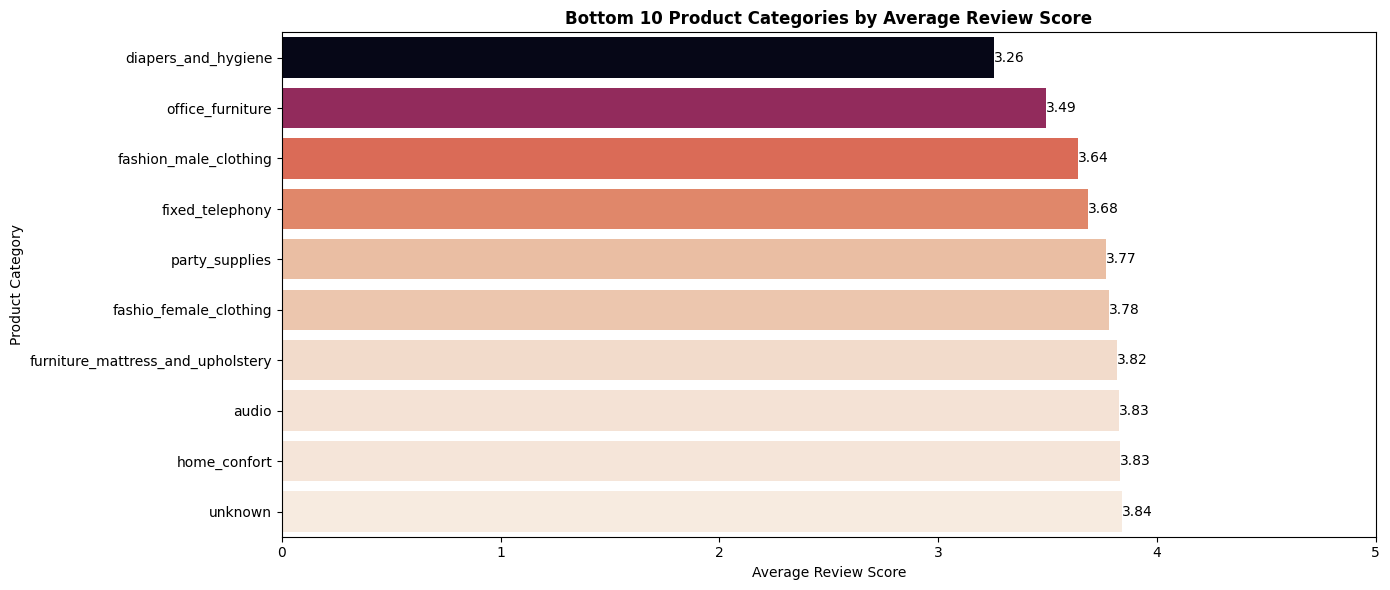

In [168]:
plt.figure(figsize=(14,6))
ax = sns.barplot(data=bottom_10, x='avg_score', y='product_category_name_english', palette='rocket',hue='avg_score',legend=False)
for container in ax.containers: 
    ax.bar_label(container, fmt='%.2f')
plt.title('Bottom 10 Product Categories by Average Review Score', fontweight='bold')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.xlim(0, 5) 
plt.tight_layout()
plt.show()

### Top 10 Lowest Product Categories by Average Review Score
- We can understand that these are the top 10 product categories with the highest average review scores, filtered to include only those with at least 30 reviews.

## Conversion Rate & Customer Retention

In [169]:
Conversion_Rate = orders[orders['order_status']=='delivered']['order_status'].count() / orders['order_status'].count()

In [170]:
print(f'Conversion_Rate = {(Conversion_Rate * 100).round(1)}%')

Conversion_Rate = 97.0%


- Almost all orders go through which means the logistics and sales are doing well.

In [171]:
orders_per_customer = customer_orders.groupby('customer_unique_id')['order_id'].nunique()

In [172]:
repeat_customers = (orders_per_customer > 1).sum()

In [173]:
no_of_customers = customer_orders['customer_unique_id'].nunique()

In [174]:
Customer_Retention = repeat_customers / no_of_customers

In [175]:
print(f'Customer_Retention = {(Customer_Retention * 100).round(1)}%')

Customer_Retention = 3.1%


- Only 3% of customers place more than one order. That’s extremely low, This problem has to be solved by having a better CRM and increase the high retention categories.

# Hypothesis Testing
- **Goal**: The goal of this hypothesis test was to determine whether late deliveries are statistically associated with a higher rate of poor customer reviews.
- **Hypothesis:**
    - **Null Hypothesis (Ho)**: Late delivery does not increase the chance of a poor review
    - **Alternative Hypothesis (H1)**: Late delivery increases the chance of a poor review

In [176]:
from statsmodels.stats.proportion import proportions_ztest

In [177]:
reviews_orders['poor_review'] = (reviews_orders['review_score'] <= 3).astype(int)

In [178]:
reviews_orders.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,shipping_time,delivery_time,estimated_vs_actual,approval_time_days,shipping_time_days,delivery_time_days,estimated_vs_actual_days,delivered_on_time,delivered_late,poor_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,1 days 06:09:23,6 days 03:11:52,15 days 05:17:19,0.011921,1.256516,6.133241,15.220359,1.0,0.0,0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,2 days 06:19:36,9 days 10:52:01,4 days 00:42:40,0.016204,2.263611,9.452789,4.029630,1.0,0.0,0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,3 days 05:44:47,13 days 07:32:26,20 days 06:31:12,0.025914,3.239433,13.314190,20.271667,1.0,0.0,0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,0 days 20:29:28,10 days 15:27:22,19 days 14:51:25,0.009792,0.853796,10.644005,19.619039,1.0,0.0,0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,5 days 03:47:53,18 days 05:34:32,8 days 07:26:25,0.200903,5.158252,18.232315,8.310012,1.0,0.0,0


In [179]:
late_delivery_reviews = reviews_orders[reviews_orders['delivered_on_time'] == 0]
ontime_delivery_reviews = reviews_orders[reviews_orders['delivered_on_time'] == 1]

In [180]:
late_poor_reviews = late_delivery_reviews['poor_review'].sum()
ontime_poor_reviews = ontime_delivery_reviews['poor_review'].sum()

In [181]:
late_total_reviews = len(late_delivery_reviews)
ontime_total_reviews = len(ontime_delivery_reviews)

In [182]:
late_poor_percentage = (late_poor_reviews / late_total_reviews) * 100
ontime_poor_percentage = (ontime_poor_reviews / ontime_total_reviews) * 100

In [183]:
count = [late_poor_reviews, ontime_poor_reviews]  
nobs = [late_total_reviews, ontime_total_reviews] 

In [184]:
stat, pvalue = proportions_ztest(count=count, nobs=nobs, alternative='larger')

In [185]:
print(f"\nHypothesis Test Results:")
print(f"Z-test Statistic: {stat:.4f}")
print(f"P-value: {pvalue:.4f}")


Hypothesis Test Results:
Z-test Statistic: 92.3018
P-value: 0.0000


# Z-Test Results Summary
## Test Results
- **Z-statistic**: 92.30  
- **P-value**: ~0.0000
## Interpretation
- **Strong Evidence**: The 0 p-value and high Z-score provide strong statistical evidence of a relationship between late deliveries and poor reviews.  
- **Impact Size**: A Z-score of 92.3 indicates an exceptionally strong effect — delivery timeliness has a major influence on customer satisfaction.  
- **Business Insight**: Improving on-time delivery performance can lead to significantly better customer review scores.  


# Final Summary of Exploratory Data Analysis 

### 1. **Dataset Preparation**
This dataset captures the complete **lifecycle** of over **100,000 e-commerce orders**, from **purchase to delivery** and **post-delivery reviews**. The **data preparation** steps included **merging multiple datasets**, **parsing datetime columns**, **removing null values** where necessary, and **deriving time-based features** for analysis.

### 2. **Order Processing and Fulfillment Analysis**
**Order lifecycle metrics** such as **approval time**, **shipping time**, and **delivery time** have been derived. The **fastest delivery times** are around **1.6 to 2.5 days**, and the category **furniture** has the **slowest delivery time** averaging **10.3 days**. **7.9% of orders** were **delivered late**, with **late deliveries** correlating strongly with **lower customer review scores**. **Efficient fulfillment** positively impacted **customer satisfaction**.

### 3. **Payment Analysis**
**Credit card payments** were the **most commonly used method - 73.67%**, especially for **higher-value orders**. **Lower-value purchases** often used **boleto** or **voucher-based payments**. These **trends** can guide **improvements** in **payment processing** and **promotional strategies**.

### 4. **Geographic Analysis**
**Sales** were highly **concentrated** in **Sao Paulo**, followed by other major states like **Rio de Janeiro** and **Minas Gerais**. **Geographic differences** were observed in **average order value** and **delivery performance**, indicating potential areas for **improving logistics** and **expanding marketing efforts**.

### 5. **Customer Satisfaction Analysis**
The **average customer review** across all categories is **4.9**, with **Books - General Interest** having the **best average review** of **4.45**. Most customers gave either **good reviews** or **1-2 star ratings**. **Delivery delays** are a key driver of **negative reviews**. Certain product categories like **Health & Beauty** consistently received **higher satisfaction scores**, while others **lagged**.

### 6. **Product Category Analysis**
**Top-performing categories** by **order volume** included **Bed & Bath**, **Sports**, and **Beauty Products**. **Shipping costs** for some **low-value items** were **disproportionately high**. **Category-level sales trends** highlighted **seasonal demand shifts** and potential **pricing inefficiencies**.

### 7. **Shipping and Logistics Analysis**
**Shipping time** varied significantly across categories. Items like **Books** and **Tools** had **faster delivery**, while **bulky goods** like **Furniture** were **slower**. Categories with **long shipping times** and **low satisfaction** may require **better fulfillment solutions**. **High shipping-to-price ratios** flagged **inefficiencies** worth addressing.

### 8. **Seller Distribution and Performance**
The analysis revealed significant **variation in seller participation** across categories:
- **Health & Beauty** had the **highest number of sellers (492)**, indicating **intense competition**.
- In contrast, categories like **Home Comfort** and **Office Furniture** had far fewer sellers (**20 and 34** respectively), suggesting either **niche markets** or **underdeveloped segments**.

#### Seller Concentration in the Marketplace (Total: **3,095 sellers**):
- **Top 1% (30 sellers)** generate **25.7% of total sales**
- **Top 5% (154 sellers)** generate **53.2% of total sales**
- **Top 10% (309 sellers)** generate **67.5% of total sales**
- **Top 20% (619 sellers)** generate **82.7% of total sales**
- **Top 50% (1,547 sellers)** generate **96.8% of total sales**

This indicates a **highly concentrated marketplace** where a **small fraction of sellers** drive the **majority of revenue**, aligning with the **Pareto Principle (80/20 Rule)**. Strategic focus should be placed on **supporting top performers** and **uplifting smaller sellers**.

### 9. **Key Business Insights**
- **Late deliveries** are one of the **primary causes of negative reviews**, especially during **peak seasons**.
- **Top-performing sellers** ship **faster** and receive **better reviews**, they could be **prioritized or incentivized**.
- **Sao Paulo** drives **most sales**, but there is **growth potential** in **underperforming regions**.
- **Payment behavior** differs by **order value**, offering opportunities for **tailored payment options**.
- **Categories** with **poor satisfaction** and **long shipping times** require **vendor review** or **process improvements**.

# RandomForestRegressor Model 

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [187]:
full_orders_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,shipping_time,delivery_time,estimated_vs_actual,approval_time_days,shipping_time_days,delivery_time_days,estimated_vs_actual_days,delivered_on_time,delivered_late,order_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,6 days 08:48:41,7 days 14:44:46,8 days 00:16:12,0.032326,6.367141,7.614421,8.011250,1.0,0.0,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,8 days 03:29:47,16 days 05:11:18,2 days 07:55:36,0.008414,8.145683,16.216181,2.330278,1.0,0.0,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,1 days 21:48:18,7 days 22:45:45,13 days 10:40:44,0.010405,1.908542,7.948437,13.444954,1.0,0.0,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,2 days 03:17:42,6 days 03:32:04,5 days 10:27:21,0.006748,2.137292,6.147269,5.435660,1.0,0.0,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,11 days 19:35:56,25 days 02:44:40,15 days 07:17:29,0.008588,11.816620,25.114352,15.303808,1.0,0.0,2017-02


In [188]:
shipping_base = full_orders_data[['customer_id', 'order_id','freight_value', 'product_weight_g', 'product_length_cm', 
                               'product_height_cm', 'product_width_cm', 'price',
                               'seller_state']].copy()

In [189]:
shipping_data = shipping_base.merge(customers, on='customer_id', how='left')

In [190]:
shipping_data.head()

,customer_id,order_id,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,13.29,650.0,28.0,9.0,14.0,58.90,SP,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,19.93,30000.0,50.0,30.0,40.0,239.90,SP,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,17.87,3050.0,33.0,13.0,33.0,199.00,MG,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,12.79,200.0,16.0,10.0,15.0,12.99,SP,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,18.14,3750.0,35.0,40.0,30.0,199.90,PR,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [191]:
shipping_model = shipping_data[['freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price','seller_state', 'customer_state']].copy()

In [192]:
shipping_model.dropna(inplace=True)

In [193]:
shipping_model.isna().sum()

freight_value        0
product_weight_g     0
product_length_cm    0
product_height_cm    0
product_width_cm     0
price                0
seller_state         0
customer_state       0
dtype: int64

In [194]:
shipping_model['product_volume_cm3'] = (shipping_model['product_length_cm'] * 
                                       shipping_model['product_height_cm'] * 
                                       shipping_model['product_width_cm'])

In [195]:
shipping_model['same_state'] = (shipping_model['seller_state'] == shipping_model['customer_state']).astype(int)

In [196]:
shipping_model['weight_to_volume_ratio'] = shipping_model['product_weight_g'] / shipping_model['product_volume_cm3']

In [197]:
features = ['product_weight_g', 'product_volume_cm3', 'price', 'same_state', 'weight_to_volume_ratio']

In [198]:
X = shipping_model[features]
y = shipping_model['freight_value']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [201]:
y_pred = rf_model.predict(X_test)

In [202]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [203]:
print(f"Random Forest Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Random Forest Model Performance:
Mean Squared Error: 82.5399
Root Mean Squared Error: 9.0851
R-squared: 0.6859


In [204]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                  Feature  Importance
1      product_volume_cm3    0.405419
0        product_weight_g    0.194289
2                   price    0.177104
3              same_state    0.145190
4  weight_to_volume_ratio    0.077998


### Shipping Cost Prediction Model — Key Summary

We developed a **Random Forest Regression** model to predict shipping costs based on product attributes and location-related features within an e-commerce marketplace.

#### Model Performance
- **R-squared:** ~0.69 — explains 69% of shipping cost variation  
- **RMSE:** ~9.09 — average prediction error of approximately $9.09

#### Top Influential Features
- **Product Volume (40.5%)** – Most significant driver of cost  
- **Product Weight (19.4%)** – Heavier items cost more to ship  
- **Product Price (17.7%)** – More valuable products slightly impact shipping  
- **Same State Shipping (14.5%)** – Shipping within the same state lowers costs  
- **Weight-to-Volume Ratio (8.0%)** – Captures product density  
- **Large Item Flag** – Helps identify items needing special handling

#### Business Insights
- **Product size and weight** are the strongest predictors, making up ~60% of cost variation  
- **Geographic proximity** significantly affects shipping expenses  
- **Item density** offers additional insights into shipping efficiency  
- Special handling may apply to oversized or dense items

#### Applications
- **Estimate shipping costs** for new product listings  
- **Optimize pricing strategies** based on physical product traits  
- **Plan inventory and logistics** with better cost foresight  
- **Enhance customer experience** by offering accurate shipping fee previews

This model offers **reliable, data-driven shipping cost predictions** using readily available product and geographic data — empowering smarter business decisions in logistics and pricing.

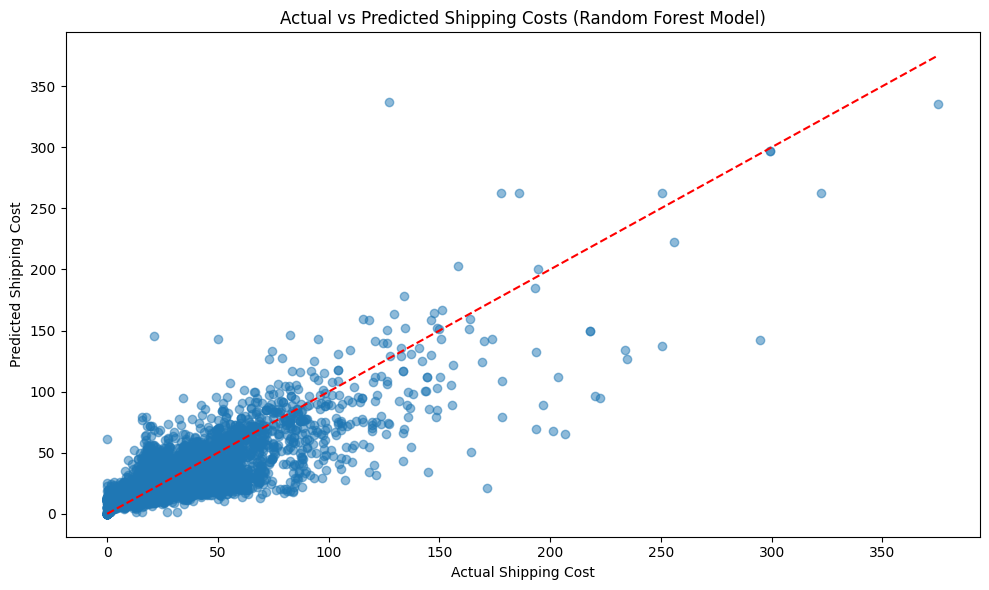

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Shipping Cost')
plt.ylabel('Predicted Shipping Cost')
plt.title('Actual vs Predicted Shipping Costs (Random Forest Model)')
plt.tight_layout()
plt.show()

### Actual vs Predicted Shipping Costs (Random Forest Model)
The scatter plot compares actual vs predicted shipping costs. The red dashed line represents perfect predictions.
- **Positive Trend:** Most low range predictions align well with actual values, indicating the model captures the beginning pattern.
- **Clustering:** Data points are densely packed in the lower-cost range, where the model performs best.
- **Underprediction at High Costs:** Predictions tend to underestimate shipping costs for higher-value shipments.
Overall, the model does perform decent in low cost range predictions.